# <div style='padding:25px;background-color:maroon;color:white;border-radius:4px;font-size:100%;text-align: center'>Banking Data Analysis<br></div>

## <span style="color:Aqua;">Importing libraries from Python</span>

In [2]:
import pandas as pd
pd.options.display.max_columns = 50
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', '{:.4f}'.format)


import numpy as np
import os
import math
from scipy.stats import pearsonr,kstest, norm, skew,kurtosis, boxcox
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
import pickle

import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.color': 'black',  # Change font color
    'axes.labelcolor': 'black',  # Change axis label color
    'xtick.color': 'black',  # Change x-tick color
    'ytick.color': 'black',  # Change y-tick color
    'font.weight': 'bold',  # Change font weight
    'axes.titleweight': 'bold',  # Change title weight
    'axes.labelweight': 'bold',# Change label weight
})


color_good = '\033[32m'   # Dark Green for near-zero skew
color_okay = '\033[92m'   # Light Green for slightly positive or slightly negative skew
color_bad = '\033[91m'    # Maroon for significant skew
color_neutral = '\033[0m' # Reset color


---
title: "Data Transformation"
author: "Santhoh Kumar"
format:
  html:
    toc: true
    html-math-method: katex
    css: styles.css
---


### <span style="color:Khaki;">Reading Feature Engineered Dataset:

In [3]:
df=pd.read_feather('feature_engineerd_data.feather')

In [4]:
df.sample(5)

age    occupation  annual_income  monthly_inhand_salary  \
4371    41    Accountant     14535.1050              1345.2587   
70583   41       Manager     85724.7000              7074.7250   
40495   24  Entrepreneur    130402.8800             10187.6674   
74982   46      Mechanic    146101.2800             12012.1067   
58679   22      Musician     59978.5200              4847.2100   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
4371                   1                7              3            2   
70583                  5                5             18            0   
40495                  4                5              7            1   
74982                  3                4              9            5   
58679                  6                7             13            0   

       delay_from_due_date  num_of_delayed_payment  changed_credit_limit  \
4371                    19                      11                     6   
70583                   26                      18                     7   
40495                    4                       6                    12   
74982                   18                      10                    19   
58679                   10                      11                     3   

       num_credit_inquiries credit_mix  outstanding_debt  \
4371                 0.0000       Good           70.6600   
70583                6.0000   Standard         1312.5000   
40495                3.0000       Good          943.7200   
74982                7.0000   Standard         1311.4700   
58679                3.0000   Standard          479.0700   

       credit_utilization_ratio  credit_history_age payment_of_min_amount  \
4371                         29                 304                    No   
70583                        27                 363                    Nm   
40495                        36                 365                    No   
74982                        36                 212                   Yes   
58679                        34                 362                    No   

       total_emi_per_month  amount_invested_monthly  \
4371               15.7750                  24.3907   
70583               0.0000                  93.1050   
40495             686.9800                 105.1307   
74982             307.1448                 327.0133   
58679               0.0000                  48.2319   

                     payment_behaviour  monthly_balance credit_score  \
4371    Low_Spent_Small_Value_Payments         307.8466         Good   
70583  Low_Spent_Medium_Value_Payments         370.2625         Good   
40495  High_Spent_Small_Value_Payments         782.8057         Good   
74982  Low_Spent_Medium_Value_Payments         189.4130     Standard   
58679   Low_Spent_Small_Value_Payments         486.2907     Standard   

       Mortgage Loan  Home Equity Loan  Credit-Builder Loan  Payday Loan  \
4371               0                 0                    1            0   
70583              0                 0                    0            0   
40495              0                 0                    0            0   
74982              1                 1                    0            0   
58679              0                 0                    0            0   

       Personal Loan  Debt Consolidation Loan  Student Loan  Auto Loan  \
4371               0                        1             0          0   
70583              0                        0             0          0   
40495              0                        0             0          1   
74982              0                        0             1          1   
58679              0                        0             0          0   

       debt_income_ratio  loan_income_ratio_month  \
4371           1453.5105                  80.1941   
70583         14287.4500                7074.7250   
40495         18628.9829                  14.8081   
74982       

## <span style="color:Khaki;">Defining variable type

In [5]:
continuous = ['age', 'annual_income', 'monthly_inhand_salary','delay_from_due_date','interest_rate', 'outstanding_debt', 'credit_utilization_ratio', 
                   'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance','changed_credit_limit', 
                    'debt_income_ratio', 'loan_income_ratio_month', 'credit_utilization_per_account', 'reliable_payment',
                  'delayed_payment_ratio', 'investment_to_income_ratio','credit_limit_change_rate', 'total_credit_exposure', 'credit_utilization_to_income_ratio', 
                   'savings_rate',  'income_stability', 'total_liability', 'debt_paytime']

In [6]:
for i in continuous:
    print(i, '>>', df[i].min(), '----',df[i].max())

age >> 14 ---- 56
annual_income >> 7005.93 ---- 179987.28
monthly_inhand_salary >> 303.6454166666666 ---- 15204.633333333331
delay_from_due_date >> 0 ---- 62
interest_rate >> 1 ---- 34
outstanding_debt >> 0.23 ---- 4998.07
credit_utilization_ratio >> 20 ---- 50
credit_history_age >> 1 ---- 404
total_emi_per_month >> 0.0 ---- 1779.1032538262775
amount_invested_monthly >> 0.0 ---- 434.1910893520318
monthly_balance >> 0.0077596647753352 ---- 1183.9306960885192
changed_credit_limit >> 0 ---- 29
debt_income_ratio >> 366.54724999999996 ---- 101912.13
loan_income_ratio_month >> 0.5049622947689958 ---- 15101.94
credit_utilization_per_account >> 1.8181818181818181 ---- 50.0
reliable_payment >> 0.0 ---- 2500.0
delayed_payment_ratio >> 0.0 ---- 23.0
investment_to_income_ratio >> 0.0 ---- 0.0653688518448969
credit_limit_change_rate >> 0.0 ---- 10.0
total_credit_exposure >> 21.95 ---- 5036.07
credit_utilization_to_income_ratio >> 0.0001224152600764664 ---- 0.005810324095626597
savings_rate >> 0.0 -

## <p Style="color: Aqua"> Data Transformation:

### <p Style="color: Khaki">Experimenting with a few types of data transformation techniques to see which one suits best.

<span style="color: Chartreuse;">   &#9784; &nbsp; <span style="color: white;font-size: 120%"> Defining a function to create plots.</span></span><br>

In [7]:
def univar_num(df, col):
    plt.figure(figsize=(16, 8))
    df = df.dropna(subset=[col])


    mean=df[col].mean()
    median=df[col].median()
    mode=df[col].mode()[0]
    sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})
    plt.subplot(2, 3, 1)
    sns.histplot(data=df, x=col, kde=True, bins=20,color='maroon',fill=True)
    plt.title(f'Histogram for {col}',fontdict={'fontsize':22,'color':'black','fontweight':'bold'})
    plt.axvline(mean, color='maroon', label='Mean')
    plt.axvline(median, color='black', label='Median')
    plt.axvline(mode, color='darkgreen', label='Mode')
    sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)

    
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(2, 3, 2)
    sns.boxplot(data=df, x=col, color='lightgrey',legend=True)
    plt.xticks(rotation=45)
    plt.title(f'Box Plot for {col}',fontdict={'fontsize':22,'color':'black','fontweight':'bold'})
    plt.axvline(mean, color='maroon', label='Mean')
    plt.axvline(median, color='black', label='Median')
    plt.axvline(mode, color='darkgreen', label='Mode')
    plt.legend()
    plt.tight_layout()

    
    plt.subplot(2, 3, 3)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.gca().get_lines()[1].set_color('maroon')
    plt.gca().get_lines()[0].set_color('darkgreen')
    plt.title(f'QQ Plot for {col}',fontdict={'fontsize':22,'color':'black','fontweight':'bold'})

    plt.tight_layout()
    
    plt.tight_layout()
    plt.show()

<span style="color: Chartreuse;">   &#9784; &nbsp; <span style="color: white;font-size: 120%"> Defining a function to apply trasformation.</span></span><br>

In [8]:

# Defining a function to perform Box-Cox
def boxcox_transform(x):
    transformed_data,lmbda = boxcox(x + np.spacing(1))
    return transformed_data,lmbda

method_functions =  {
    'log': lambda x: np.log(x + np.spacing(1)),
    'square': np.sqrt,
    'rec': lambda x: np.where(x != 0, 1 / x, np.spacing(1)),
    'sig': lambda x: 1 / (1 + np.exp(-x)),
    'cube': lambda x: np.power(x, 3),
    'exp':lambda x: x**(1/5),
    'boxcox': boxcox_transform,
        }

def skewness_checker(df, column, method,pkl_path=None):
    transformed_columns = {}
    transformation_params = {}

    for method_name, func in method_functions.items():
        for col in column:

            new_column = f'{col}_{method_name}'
            if method_name == 'boxcox':
                transformed_values, lmbda = func(df[col])
                transformation_params[new_column] = lmbda 
            else:
                transformed_values = func(df[col])
            transformed_columns[new_column] = transformed_values
    normalized_df = pd.DataFrame(transformed_columns)
    if not os.path.exists(pkl_path):
        os.makedirs(pkl_path)
    file_path = os.path.join(pkl_path,'transformation_params.pkl')
    with open(file_path, 'wb') as f:
        pickle.dump(transformation_params, f)
        
    return normalized_df, transformation_params

<span style="color: Chartreuse;">   &#9784; &nbsp; <span style="color: white;font-size: 120%">Creating a new Data Frame that contains transformed values:

In [15]:
normalized_df, params = skewness_checker(df, continuous, method_functions,pkl_path='pkls/transformation_params.pkl')
normalized_df.sample(5)

age_log  annual_income_log  monthly_inhand_salary_log  \
57967   2.9957            10.5843                     8.0860   
29244   3.9512            10.4906                     8.0475   
1748    3.6889            10.7389                     8.2824   
72675   3.5835            11.0151                     8.5378   
5780    3.0445             9.6421                     7.2712   

       delay_from_due_date_log  interest_rate_log  outstanding_debt_log  \
57967                   3.4012             3.1781                7.1733   
29244                   1.9459             2.4849                6.3433   
1748                    3.1355             3.1781                7.8362   
72675                   2.8332             2.5649                3.8347   
5780                    3.3673             2.8904                6.3224   

       credit_utilization_ratio_log  credit_history_age_log  \
57967                        3.2581                  4.3175   
29244                        3.6109                  5.9349   
1748                         3.3673                  5.2364   
72675                        3.6636                  5.9296   
5780                         3.3322                  5.8230   

       total_emi_per_month_log  amount_invested_monthly_log  \
57967                   4.4003                       3.1436   
29244                   3.9832                       4.5618   
1748                    4.0213                       3.9385   
72675                 -36.0437                       4.3324   
5780                    2.4352                       3.3071   

       monthly_balance_log  changed_credit_limit_log  debt_income_ratio_log  \
57967               5.7326                    0.0000                 8.0994   
29244               5.0686                    2.0794                 8.5447   
1748                6.2368                    2.3979                 8.6594   
72675               6.3752                    2.7081                 8.9356   
5780                5.8226                    2.8904                 8.0327   

       loan_income_ratio_month_log  credit_utilization_per_account_log  \
57967                       3.6734                              1.1787   
29244                       4.0459                              2.5123   
1748                        4.2433                              1.2879   
72675                       8.5378                              1.7177   
5780                        4.7520                              1.7228   

       reliable_payment_log  delayed_payment_ratio_log  \
57967                3.4232                     1.7492   
29244               -0.2311                    -0.2877   
1748                 1.5660                     1.0986   
72675                1.4482                     2.7726   
5780                 1.4212                     1.9459   

       investment_to_income_ratio_log  credit_limit_change_rate_log  \
57967                         -4.9427                       -4.3307   
29244                         -3.4860                       -3.8581   
1748                          -4.3441                       -2.8439   
72675                         -4.2056                       -3.2242   
5780                          -3.9648                       -2.9356   

       total_credit_exposure_log  credit_utilization_to_income_ratio_log  \
57967                     7.1930                                 -7.3262   
29244                     6.4063                                 -6.8797   
1748                      7.8476                                 -7.3716   
72675                     4.4459                                 -7.3515   
5780                      6.3715                                 -6.3099   

       savings_rate_log  income_stability_log  total_liability_log  \
57967           -4.9424               -0.0135               7.2339   
29244           -3.4857                0.0418               6.4335   
1748            -4.3439                0.0285     

#### <p Style="color: Aqua"> Plotting all type of transformed values:

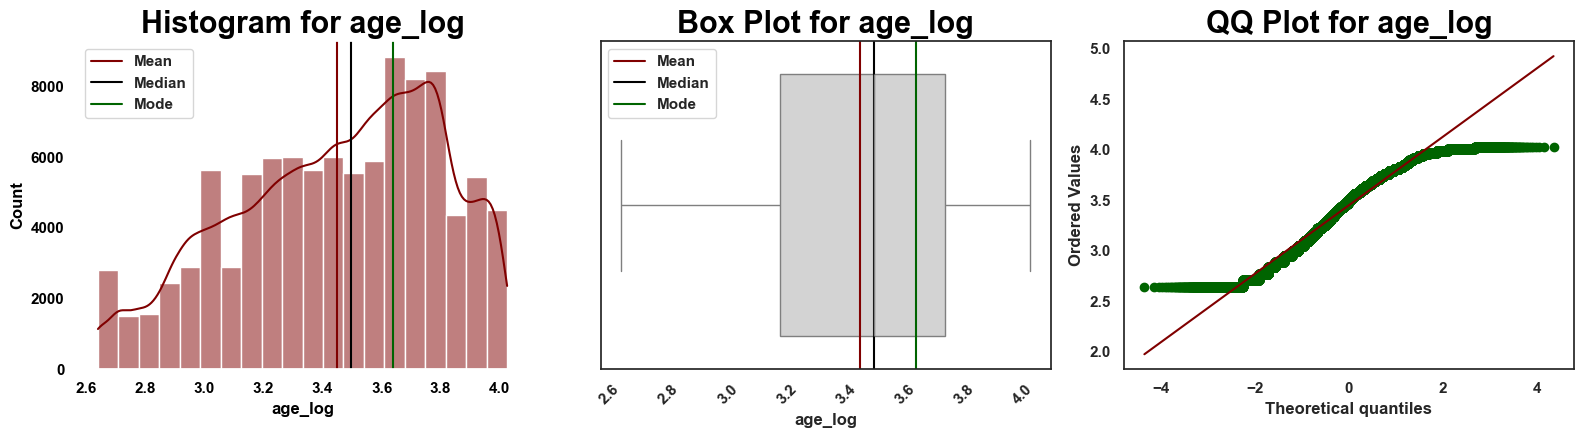



Skew for age_log is -0.39

Kurtosis for age_log is -0.74




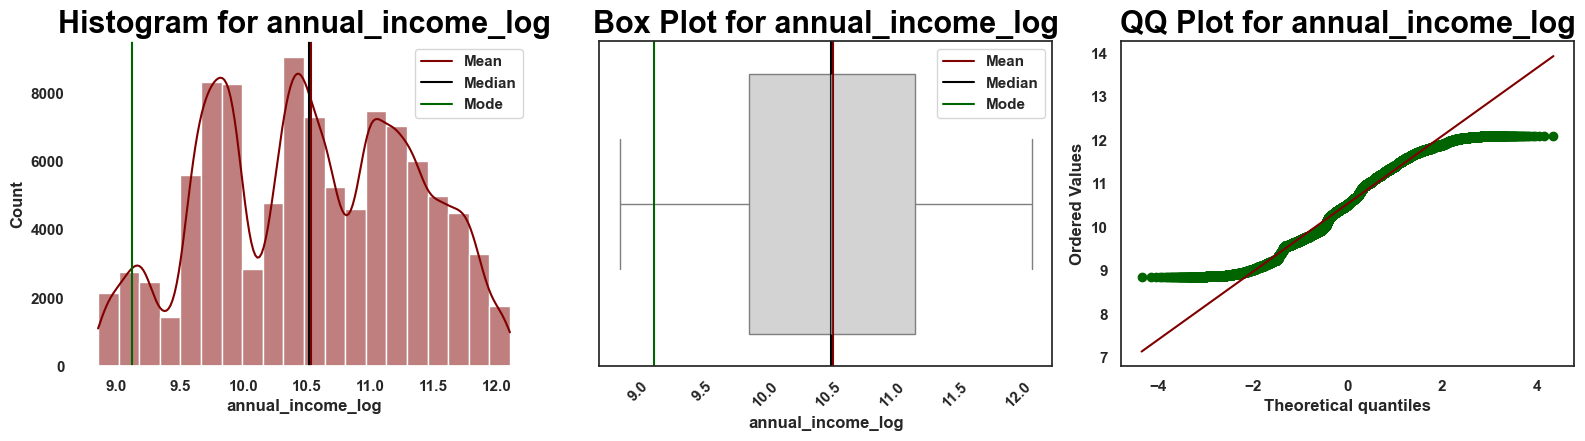



Skew for annual_income_log is -0.08

Kurtosis for annual_income_log is -0.92




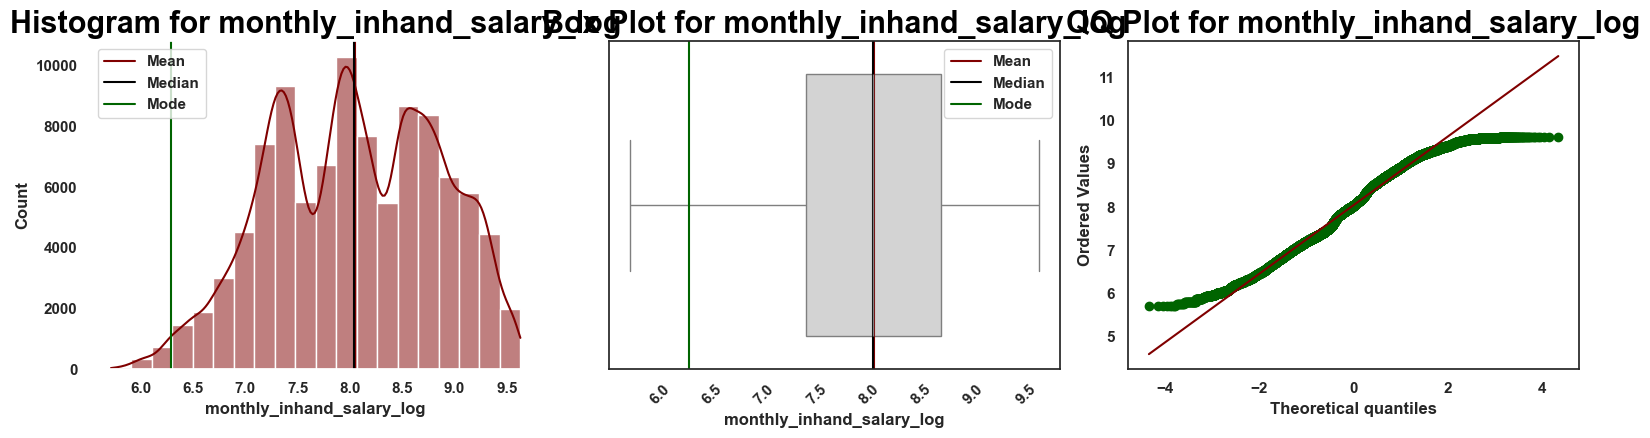



Skew for monthly_inhand_salary_log is -0.14

Kurtosis for monthly_inhand_salary_log is -0.78




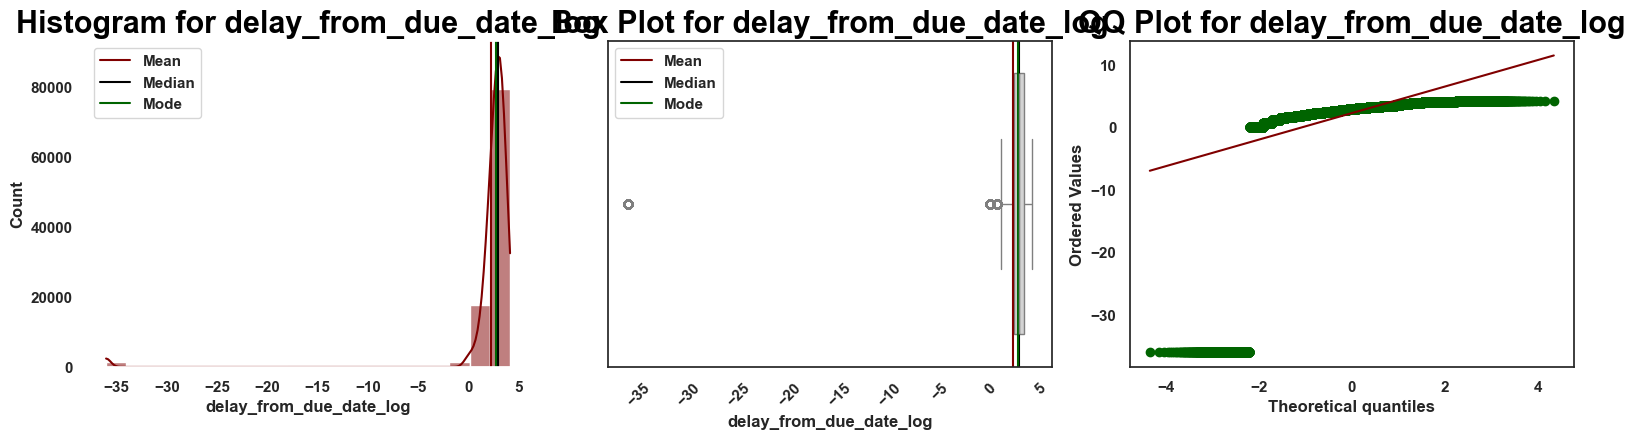



Skew for delay_from_due_date_log is -7.93

Kurtosis for delay_from_due_date_log is 62.89




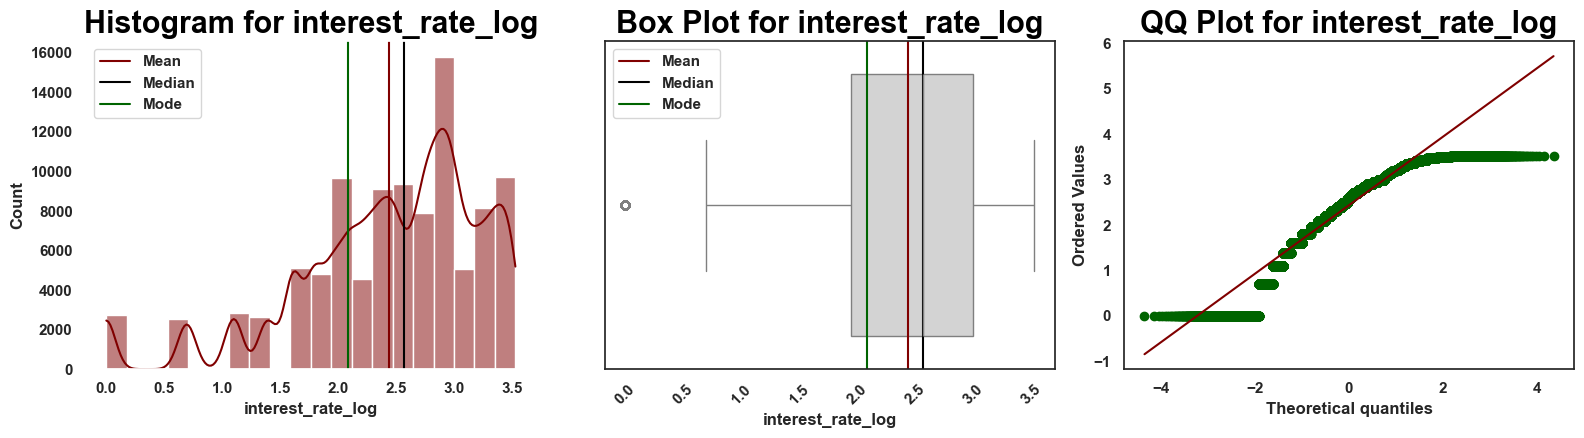



Skew for interest_rate_log is -1.02

Kurtosis for interest_rate_log is 0.98




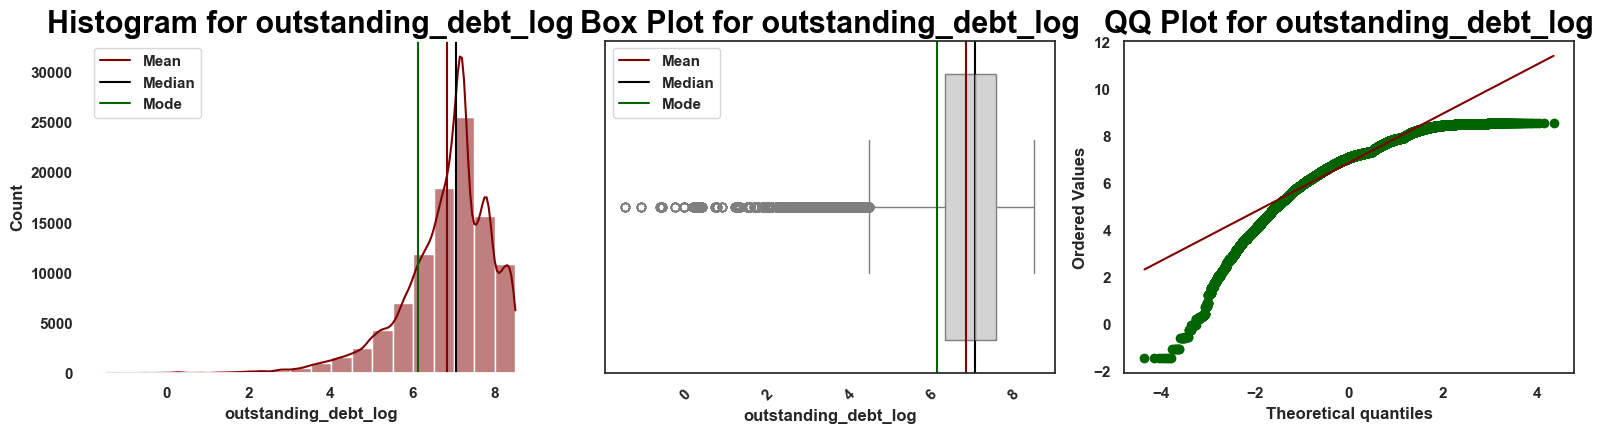



Skew for outstanding_debt_log is -1.41

Kurtosis for outstanding_debt_log is 3.78




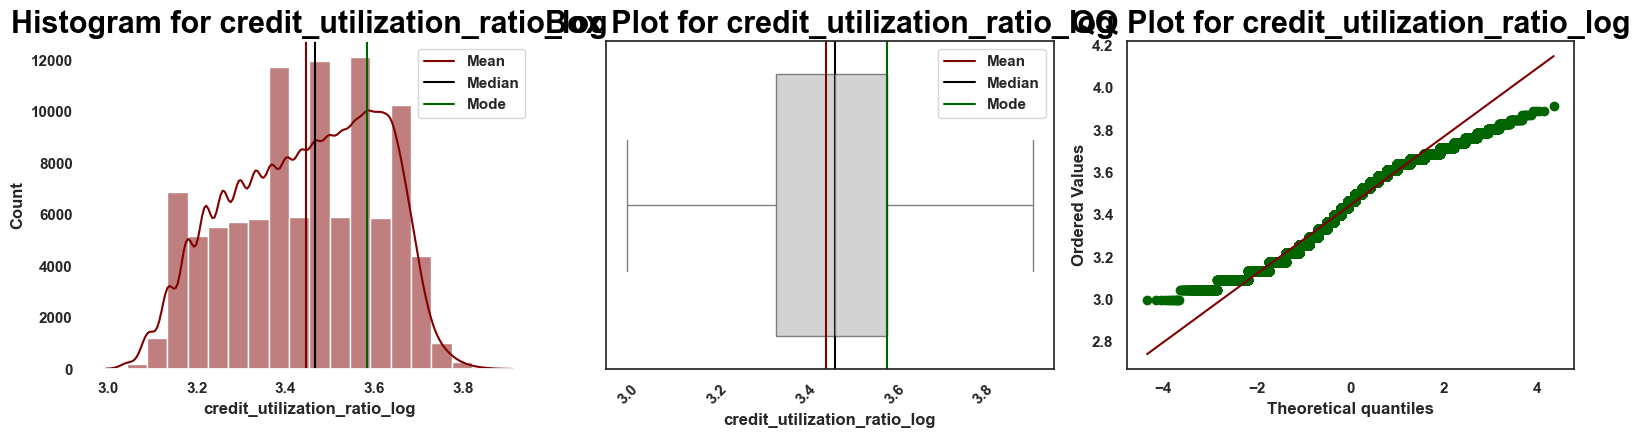



Skew for credit_utilization_ratio_log is -0.23

Kurtosis for credit_utilization_ratio_log is -0.90




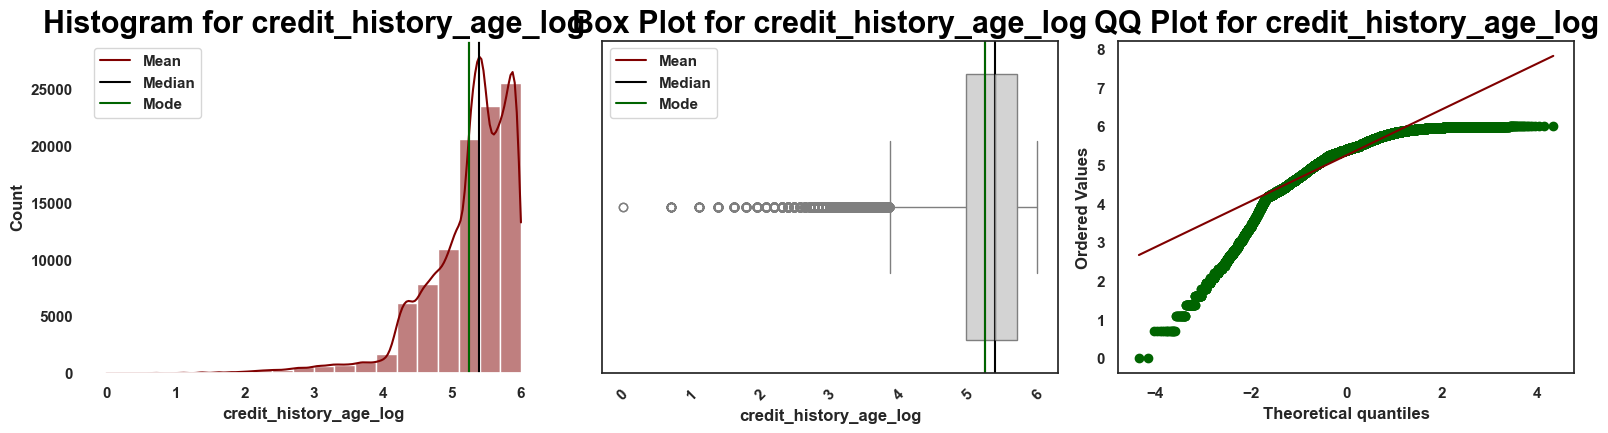



Skew for credit_history_age_log is -1.82

Kurtosis for credit_history_age_log is 5.13




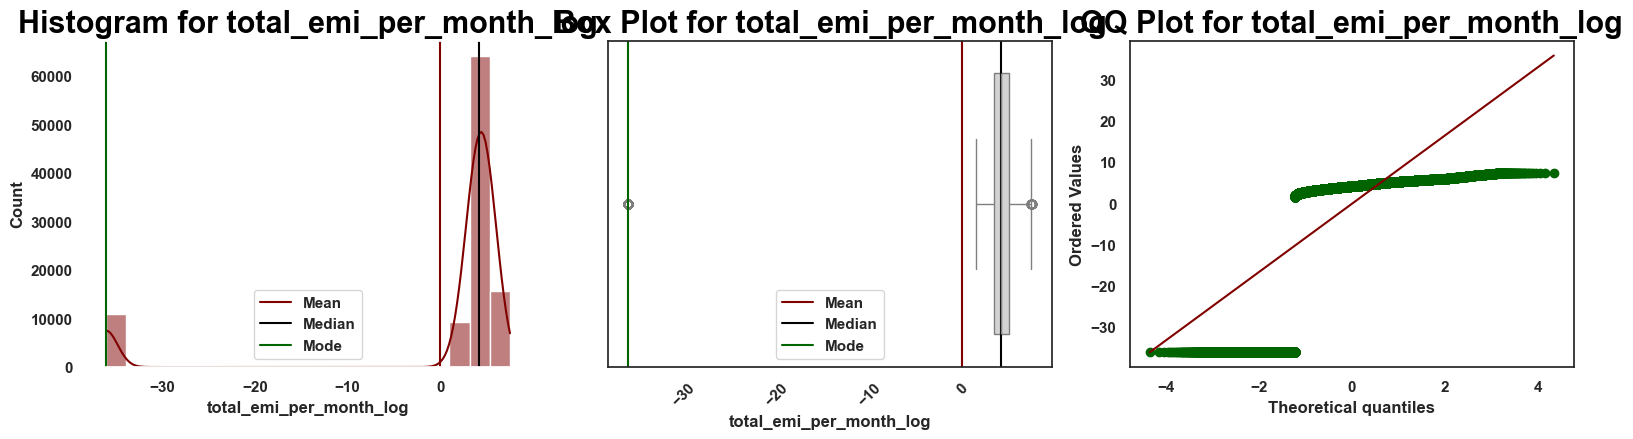



Skew for total_emi_per_month_log is -2.47

Kurtosis for total_emi_per_month_log is 4.16




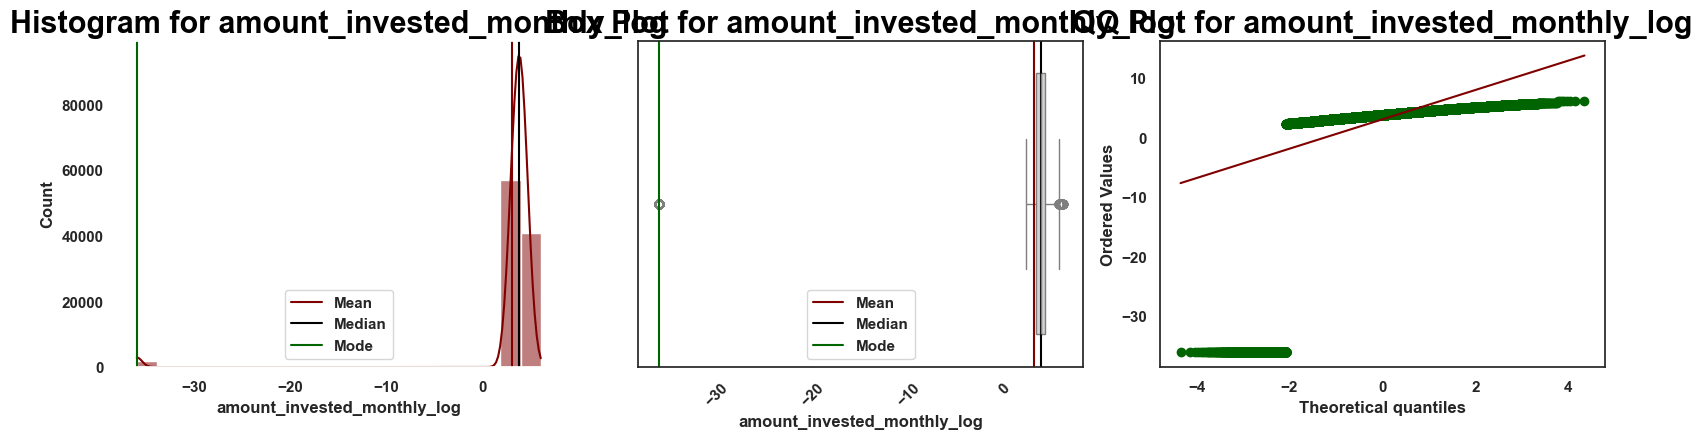



Skew for amount_invested_monthly_log is -6.86

Kurtosis for amount_invested_monthly_log is 45.76




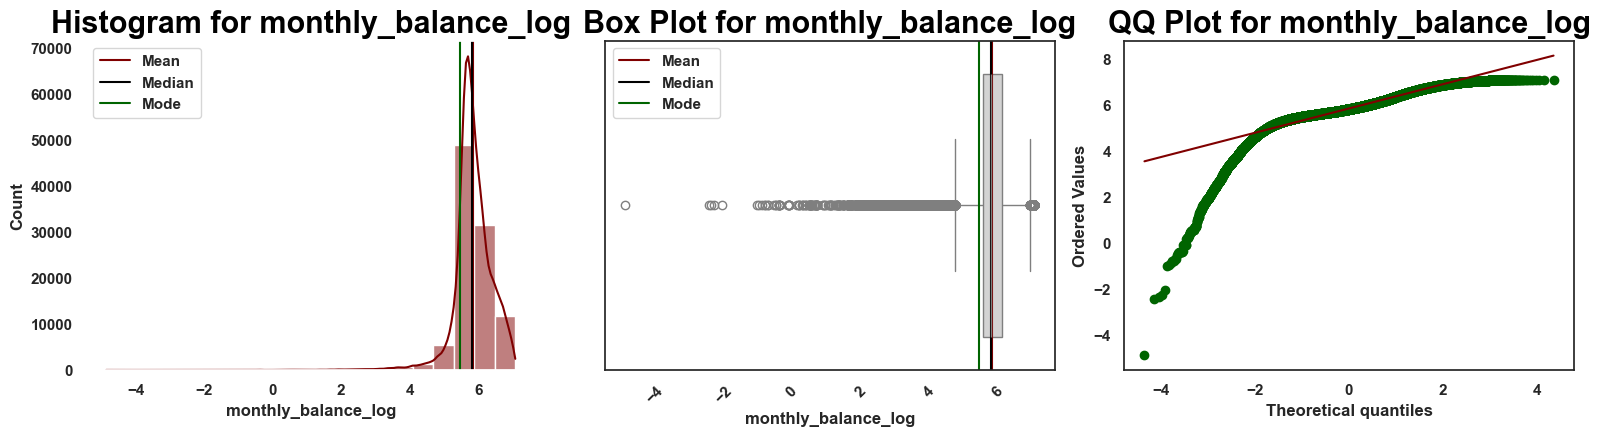



Skew for monthly_balance_log is -1.99

Kurtosis for monthly_balance_log is 15.44




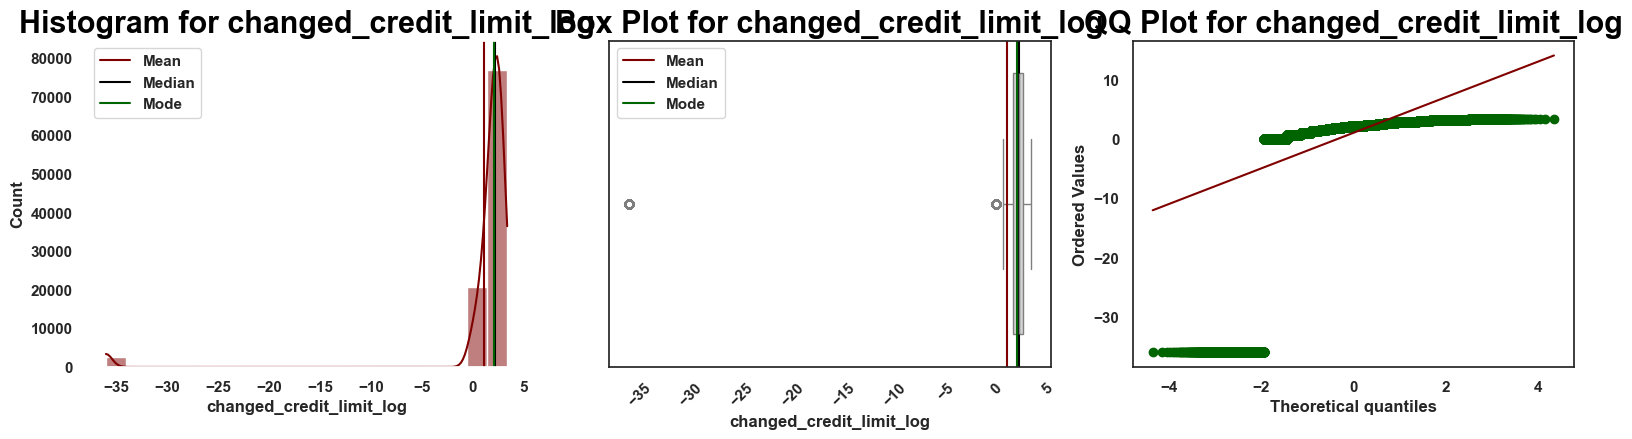



Skew for changed_credit_limit_log is -5.78

Kurtosis for changed_credit_limit_log is 32.00




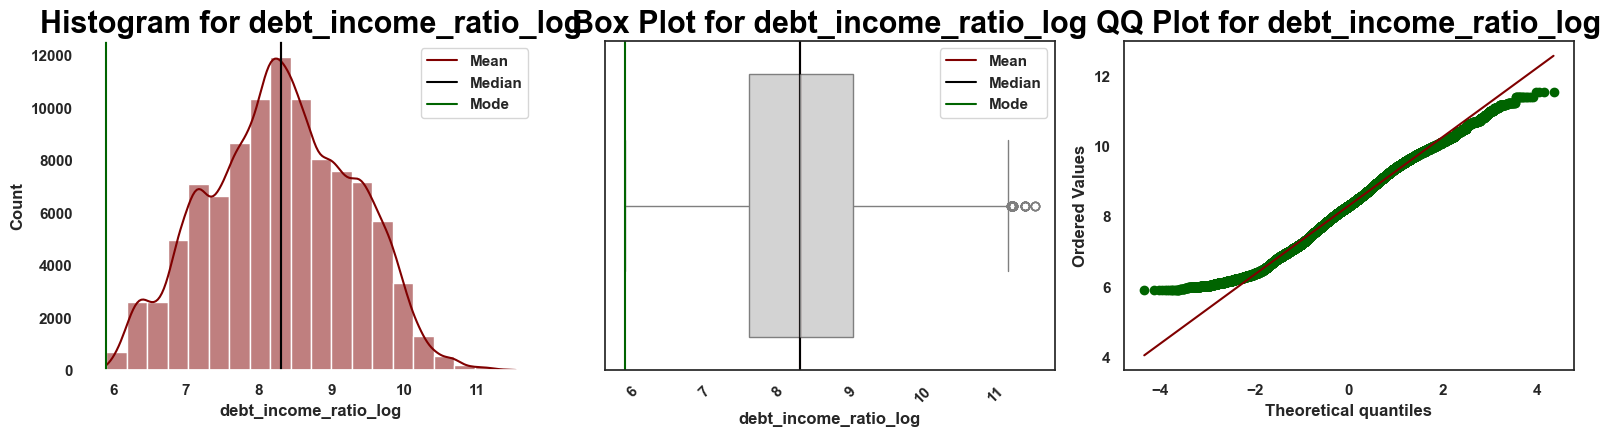



Skew for debt_income_ratio_log is -0.02

Kurtosis for debt_income_ratio_log is -0.56




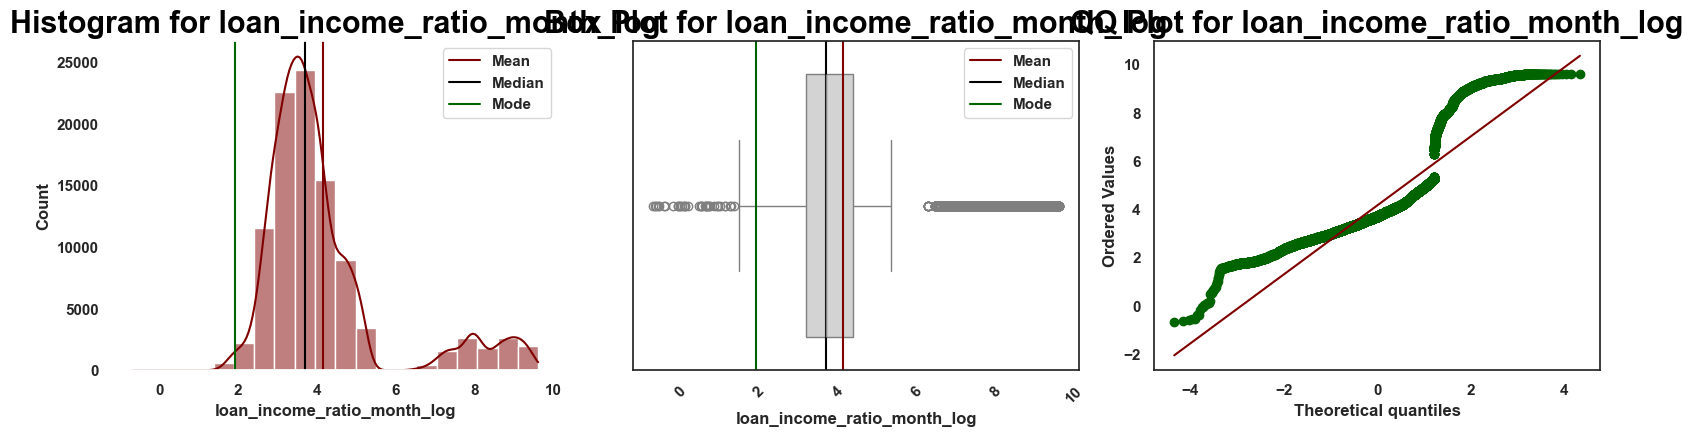



Skew for loan_income_ratio_month_log is 1.83

Kurtosis for loan_income_ratio_month_log is 2.77




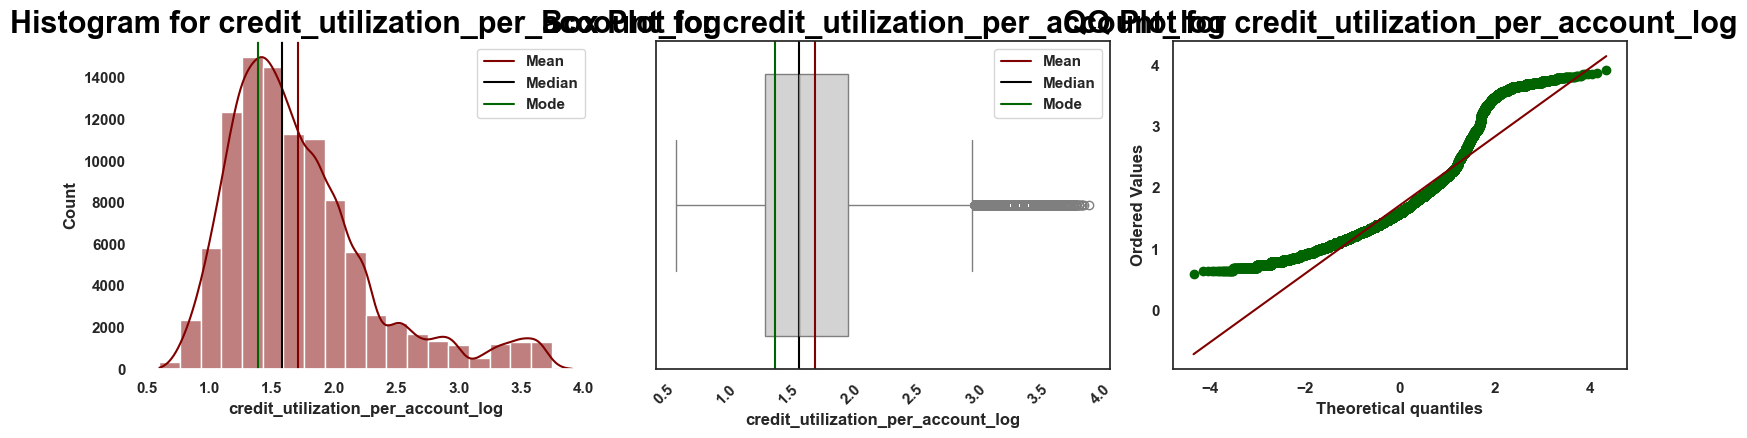



Skew for credit_utilization_per_account_log is 1.27

Kurtosis for credit_utilization_per_account_log is 1.72




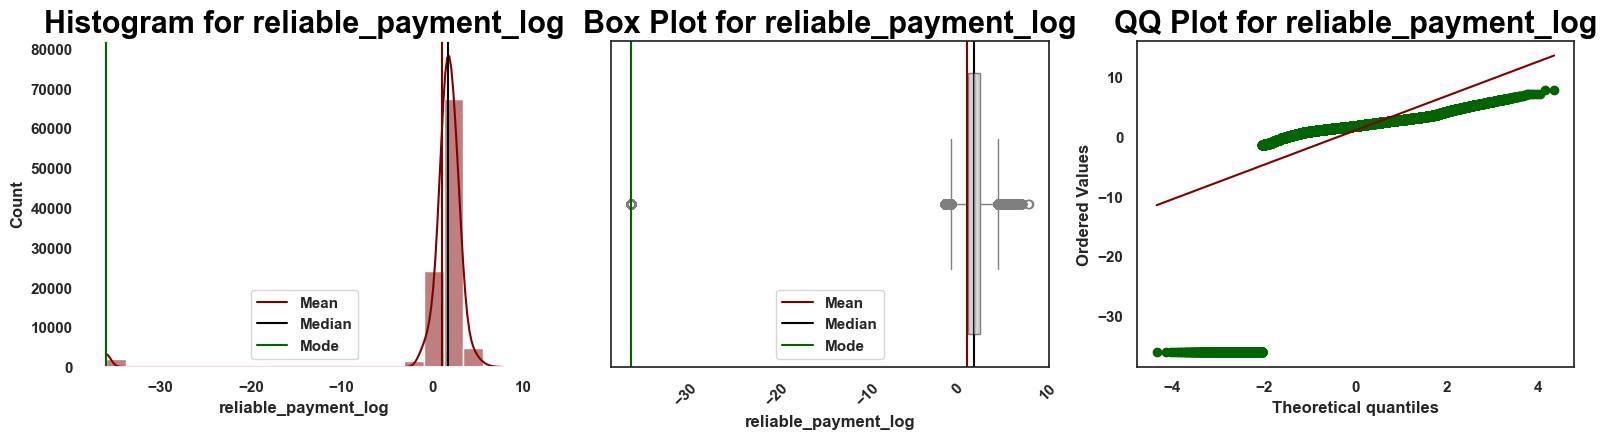



Skew for reliable_payment_log is -6.33

Kurtosis for reliable_payment_log is 39.72




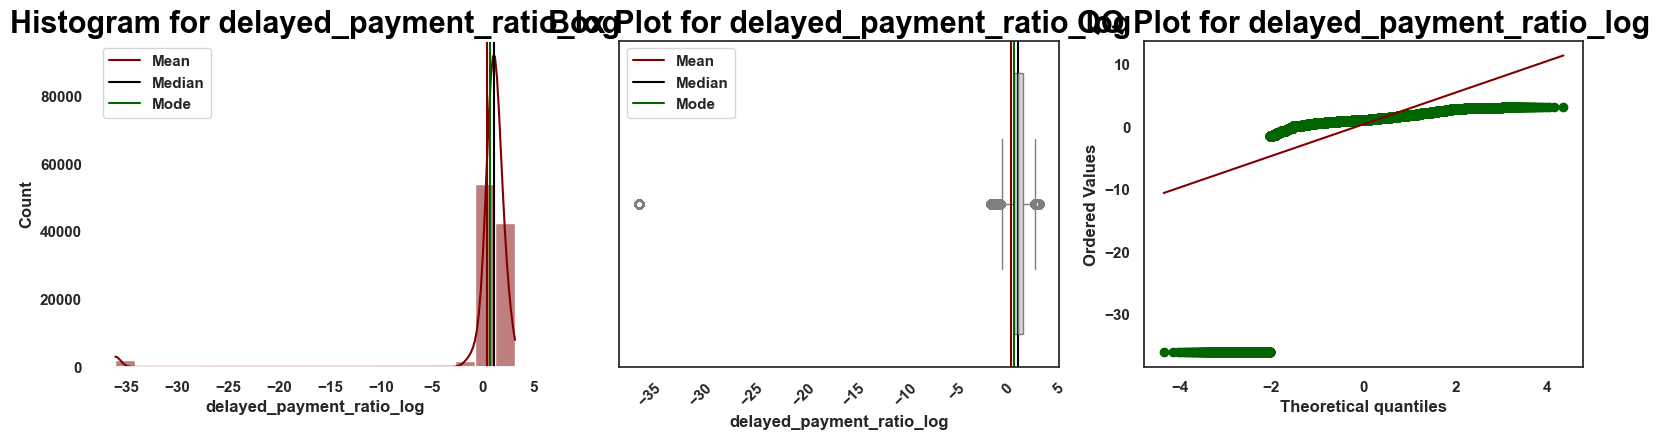



Skew for delayed_payment_ratio_log is -6.52

Kurtosis for delayed_payment_ratio_log is 41.39




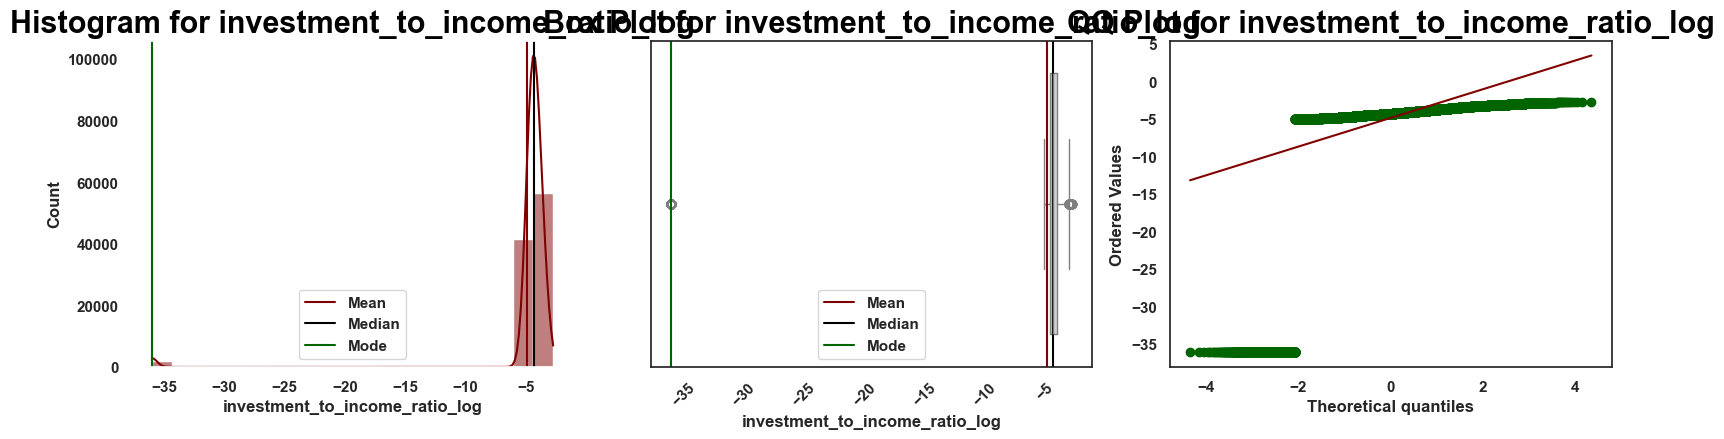



Skew for investment_to_income_ratio_log is -6.89

Kurtosis for investment_to_income_ratio_log is 46.04




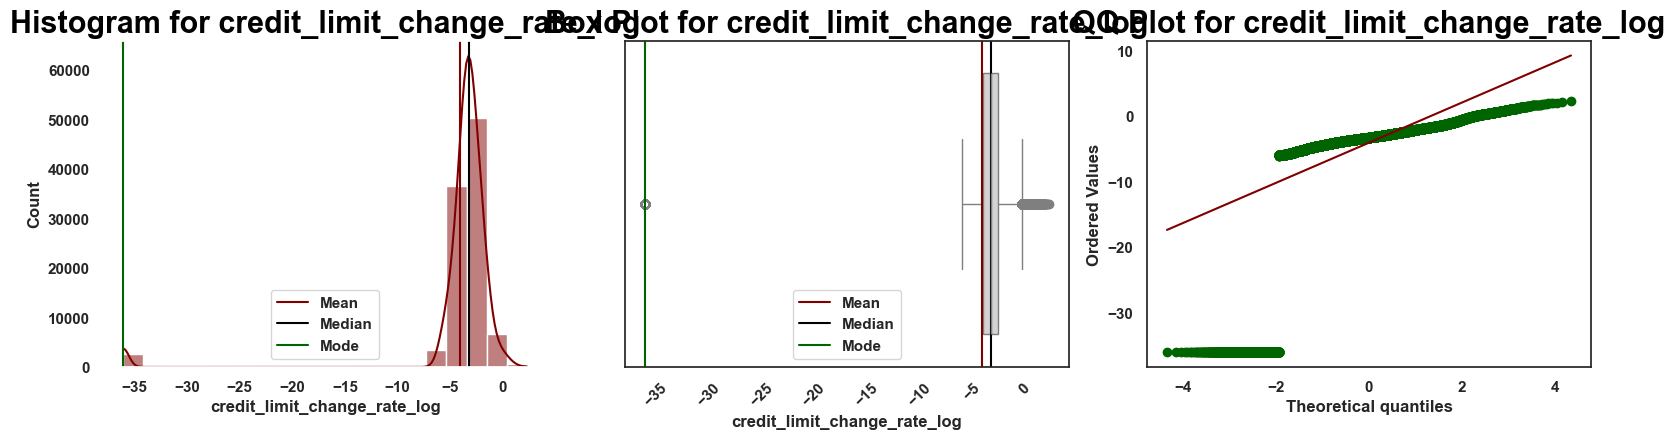



Skew for credit_limit_change_rate_log is -5.50

Kurtosis for credit_limit_change_rate_log is 29.90




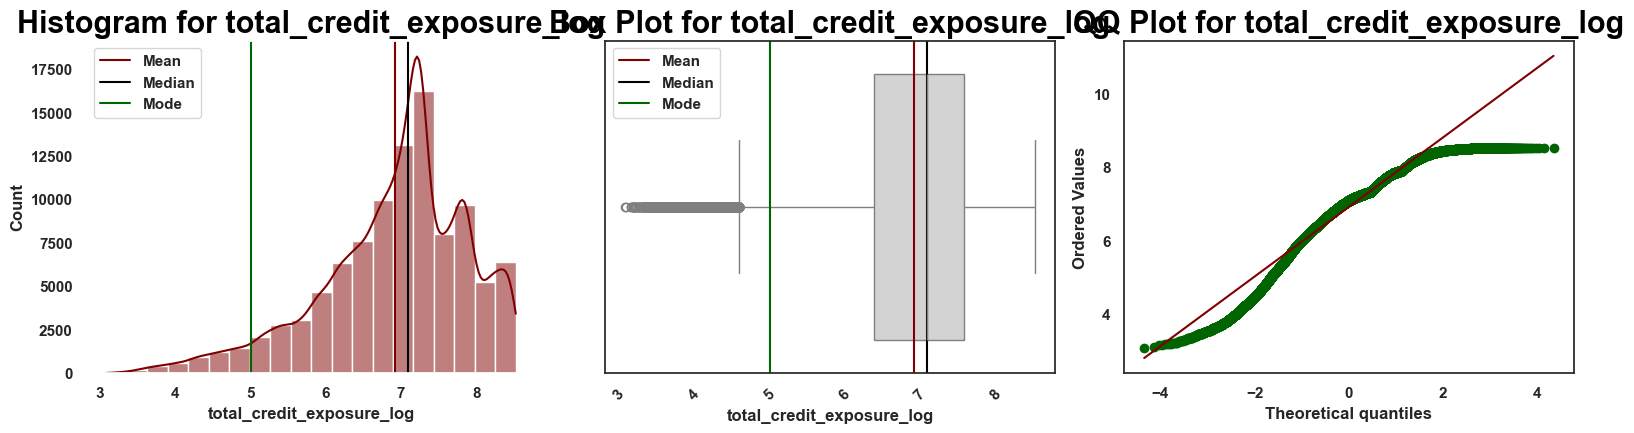



Skew for total_credit_exposure_log is -0.82

Kurtosis for total_credit_exposure_log is 0.65




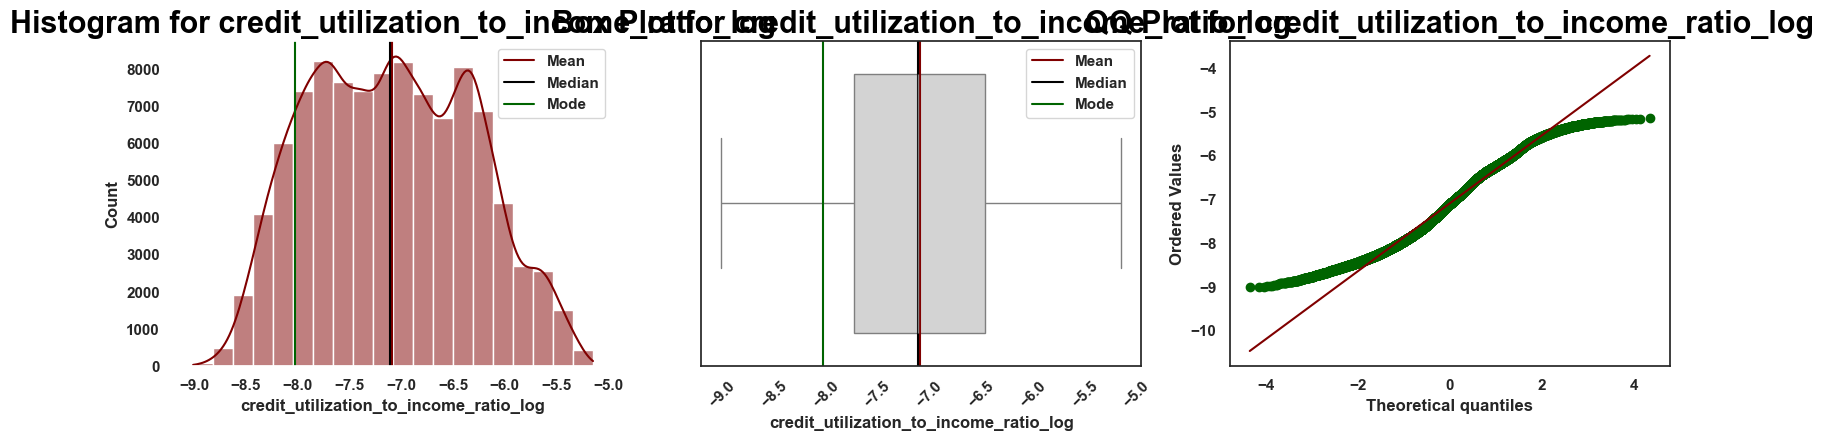



Skew for credit_utilization_to_income_ratio_log is 0.12

Kurtosis for credit_utilization_to_income_ratio_log is -0.85




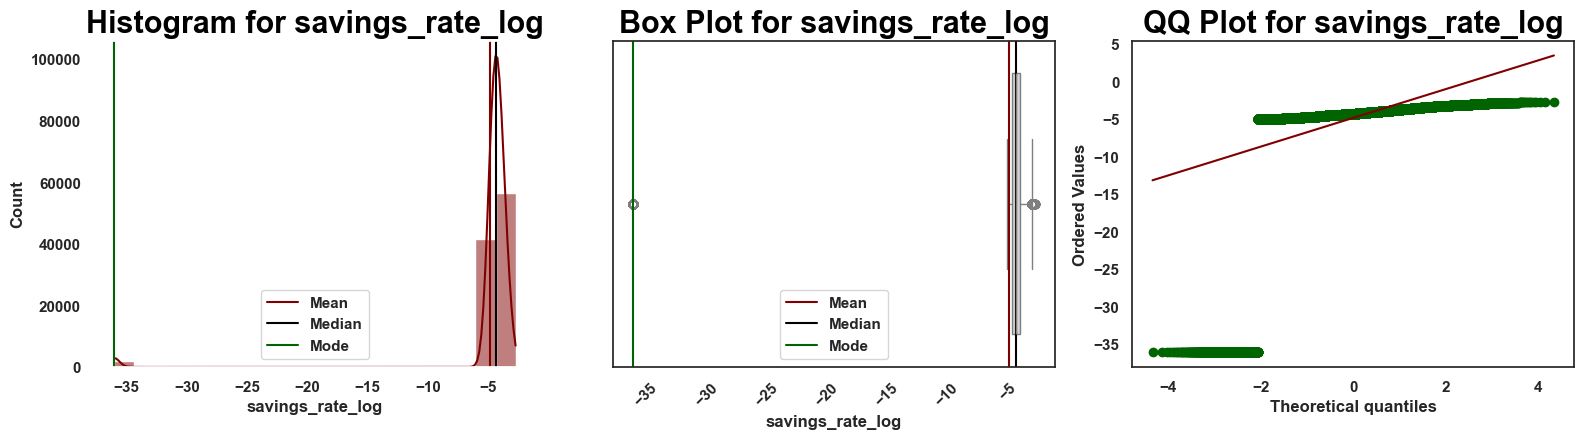



Skew for savings_rate_log is -6.89

Kurtosis for savings_rate_log is 46.04




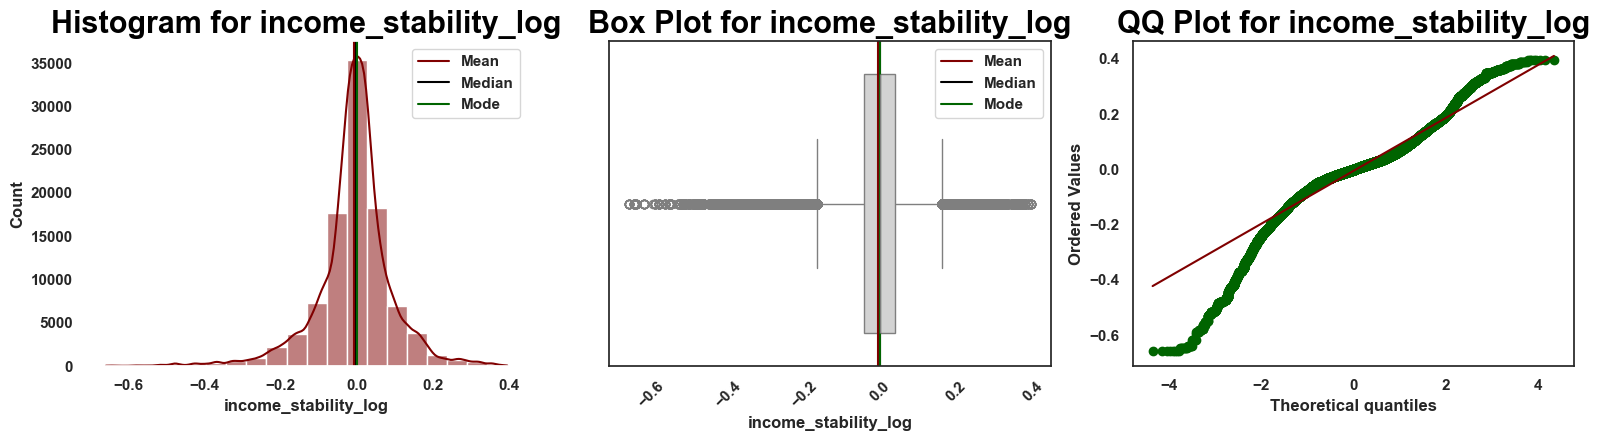



Skew for income_stability_log is -0.72

Kurtosis for income_stability_log is 4.29




In [16]:
transformed_skewness = {}
transformed_kurtosis = {}
for i in normalized_df.columns:
    univar_num(normalized_df,i)
    skews=normalized_df[i].skew()
    kurt=normalized_df[i].kurtosis()
    transformed_skewness.update({i:skews})
    transformed_kurtosis.update({i:kurt})
    color = color_neutral
    if -0.5 <= skews <= 0.5:
        color = color_good  # Dark Green for near-zero skew
    elif 0 < skews <= 0.5 or -0.5 < skews < 0:
        color = color_okay  # Light Green for slightly positive or slightly negative skew
    else:  # skew_val > 0.5 or skew_val < -0.5
        color = color_bad  # Maroon for significant skew
      
    print(f"\n\n{color}Skew for {i} is {skews:.2f}{color_neutral}")    
    print(f"\n{color}Kurtosis for {i} is {kurt:.2f}{color_neutral}\n\n")
print( 'Skewness:\n',transformed_skewness,'\n\n','Kurtois:\n',transformed_kurtosis)


<span style="color: Chartreuse;font-size:150%">   &#9784; </span> <span style="color: Tomato;font-size: 120%;background-color:"> <b> Based on the skewness and kurtosis values, the <span Style="color:Aqua"> Box-Cox transformation </span>is the best choice for addressing outliers and normalizing the distributions of both floor_area_sqm and resale_price. This should improve the performance of your predictive models.</b></span>

### <p Style="color: Khaki"> Applying Box-Cox transformation to our data:

In [62]:
lambda_dict = {}

df['age_boxcox'] , lambda_dict['age_lambda'] = boxcox_transform(df['age'] + np.spacing(1))
df['annual_income_boxcox'] , lambda_dict['annual_income_lambda'] = boxcox_transform(df['annual_income'])

os.makedirs('pkls', exist_ok=True)
with open(r'pkls/boxcox_lambdas.pkl', 'wb') as f:
    pickle.dump(lambda_dict, f)

In [63]:
df1.sample(6)

month         town flat_type  floor_area_sqm         flat_model  \
156342     7   Ang Mo Kio    3 Room            68.0     New Generation   
360655     9  Jurong West    5 Room           115.0  Premium Apartment   
334766     9  Bukit Merah    4 Room            92.0     New Generation   
58425      8    Pasir Ris    5 Room           125.0           Improved   
75677      8  Jurong West    3 Room            74.0            Model A   
80198      9       Yishun    3 Room            68.0     New Generation   

       lease_commence_date  resale_price floors  floor_no  year  \
156342                1981      360000.0      3        12  2023   
360655                2001      453000.0      3         3  2011   
334766                1978      470000.0      3         9  2010   
58425                 1996      340000.0      3        12  2001   
75677                 1985      101000.0      3         3  1994   
80198                 1984      265000.0      3         3  2020   

                             full_address  price_per_sqm remaining_lease_year  \
156342    330 Ang Mo Kio Ave 1 Ang Mo Kio    5294.117647                   57   
360655  602 Jurong West St 62 Jurong West    3939.130435                   89   
334766    65 Telok Blangah Dr Bukit Merah    5108.695652                   67   
58425       740 Pasir Ris St 71 Pasir Ris    2720.000000                   94   
75677   440 Jurong West Ave 1 Jurong West    1364.864865                   90   
80198           138 Yishun Ring Rd Yishun    3897.058824                   63   

        resale_price_boxcox  floor_area_boxcox  
156342           621.115111           9.417597  
360655           687.213432          11.792935  
334766           698.444011          10.731296  
58425            605.682343          12.211020  
75677            354.734129           9.771330  
80198            542.736522           9.417597

## <p Style="color:Khaki"> Exploratory Data Analysis. After Handling Skewness and Outliers

In [17]:
continuous = ['floor_area_sqm', 'resale_price','resale_price_boxcox','floor_area_boxcox']


In [24]:
df1[df1.resale_price>1400000]

month          town  flat_type  floor_area_sqm              flat_model  \
133147     7    Queenstown     5 Room        122.0000  Premium Apartment Loft   
154815     6   Bukit Merah     4 Room        176.0000           Adjoined Flat   
156056     6     Toa Payoh     5 Room        117.0000                    Dbss   
159010     8  Central Area     4 Room         94.0000                 Type S1   
159017     8  Central Area     5 Room        107.0000                 Type S2   
160483     8     Toa Payoh     5 Room        114.0000                    Dbss   
161046     9        Bishan     5 Room        120.0000                    Dbss   
161051     9        Bishan  Executive        172.0000              Maisonette   
161228     9   Bukit Merah     5 Room        113.0000                Improved   
163271    10   Bukit Merah     5 Room        113.0000                Improved   
163354    10  Central Area     5 Room        106.0000                 Type S2   
165461    11   Bukit Merah     5 Room        113.0000                Improved   
165463    11   Bukit Merah     5 Room        113.0000                Improved   
167627    12  Central Area     4 Room         93.0000                 Type S1   
167629    12  Central Area     5 Room        105.0000                 Type S2   
169392     1        Bishan     5 Room        120.0000                    Dbss   
169741     1  Central Area     5 Room        105.0000                 Type S2   
171362     1     Toa Payoh     5 Room        117.0000                    Dbss   
171364     1     Toa Payoh     5 Room        117.0000                    Dbss   
171960     2        Bishan  Executive        172.0000              Maisonette   
174280     3   Bukit Merah     5 Room        112.0000                Improved   
176513     4   Bukit Timah  Executive        146.0000              Maisonette   
176528     4  Central Area     5 Room        107.0000                 Type S2   
177949     4     Toa Payoh     5 Room        117.0000                    Dbss   
178594     5        Bishan     5 Room        120.0000                    Dbss   
178597     5        Bishan  Executive        141.0000               Apartment   
178600     5        Bishan  Executive        172.0000              Maisonette   
178940     5  Central Area     4 Room         93.0000                 Type S1   
178943     5  Central Area     5 Room        106.0000                 Type S2   
180912     6   Bukit Merah     5 Room        113.0000                Improved   

       lease_commence_date  resale_price floors  floor_no  year  \
133147                2016  1418000.0000      3        39  2022   
154815                1973  1500000.0000      3         6  2023   
156056                2012  1420000.0000      3        42  2023   
159010                2011  1410000.0000      3        51  2023   
159017                2011  1480000.0000      3        30  2023   
160483                2012  1460000.0000      3        42  2023   
161046                2011  1430000.0000      3        36  2023   
161051                1992  1450000.0000      3        21  2023   
161228                2019  1430000.0000      3        36  2023   
163271                2019  1450000.0000      3        21  2023   
163354                2011  1438888.0000      3        45  2023   
165461                2019  1450000.0000      3        45  2023   
165463                2019  1460000.0000      3        33  2023   
167627                2011  1410888.0000      3        48  2023   
167629                2011  1420000.0000      3        30  2023   
169392                2011  1458000.0000      3        42  2024   
169741                2011  1450000.0000      3        48  2024   
171362                2012  1568888.0000      3        42  2024   
171364                2012  1540000.0000      3        33  2024   
171960                1992  1480000.0000      3        24  2024   
174280                2016  1450000.0000      3        21  2024   
176513               

In [8]:
df1.describe().T

count         mean          std        min          25%  \
floor_area_sqm  927465.0      95.6912      25.8250    28.0000      73.0000   
resale_price    927465.0  320848.0588  170522.8573  5000.0000  193000.0000   
floor_no        927465.0       8.6972       4.8221     3.0000       6.0000   
price_per_sqm   927465.0    3318.1377    1532.1337   161.2903    2292.2609   

                        50%       75%         max  
floor_area_sqm      93.0000     113.0  3.0700e+02  
resale_price    297500.0000  418000.0  1.5880e+06  
floor_no             9.0000      12.0  5.1000e+01  
price_per_sqm     2956.5217    4200.0  1.5591e+04

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927465 entries, 0 to 181261
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   month                 927465 non-null  category
 1   town                  927465 non-null  category
 2   flat_type             927465 non-null  category
 3   floor_area_sqm        927465 non-null  float64 
 4   flat_model            927465 non-null  category
 5   lease_commence_date   927465 non-null  category
 6   resale_price          927465 non-null  float64 
 7   floors                927465 non-null  category
 8   floor_no              927465 non-null  int8    
 9   year                  927465 non-null  category
 10  full_address          927465 non-null  category
 11  price_per_sqm         927465 non-null  float64 
 12  remaining_lease_year  927465 non-null  category
 13  resale_price_boxcox   927465 non-null  float64 
 14  floor_area_boxcox     927465 non-null  fl

In [67]:
df1.shape

(927465, 15)

In [23]:
cap = df1['resale_price'].quantile(.999)
cap

1060000.0

In [98]:
df1[df1.flat_type =='3 Room']

month        town flat_type  floor_area_sqm      flat_model  \
4          1  Ang Mo Kio    3 Room            73.0  New Generation   
5          1  Ang Mo Kio    3 Room            67.0  New Generation   
6          1  Ang Mo Kio    3 Room            67.0  New Generation   
7          1  Ang Mo Kio    3 Room            67.0  New Generation   
8          1  Ang Mo Kio    3 Room            67.0  New Generation   
...      ...         ...       ...             ...             ...   
181236     6      Yishun    3 Room            66.0  New Generation   
181237     6      Yishun    3 Room            67.0         Model A   
181238     6      Yishun    3 Room            67.0         Model A   
181239     6      Yishun    3 Room            68.0         Model A   
181240     6      Yishun    3 Room            67.0  New Generation   

       lease_commence_date  resale_price floors  floor_no  year  \
4                     1976       47200.0      3         6  1990   
5                     1977       46000.0      3         3  1990   
6                     1977       42000.0      3         9  1990   
7                     1977       38000.0      3        12  1990   
8                     1977       40000.0      3         6  1990   
...                    ...           ...    ...       ...   ...   
181236                1985      370000.0      3         3  2024   
181237                2015      415000.0      3         3  2024   
181238                2018      470000.0      3         9  2024   
181239                2016      485000.0      3         9  2024   
181240                1984      408000.0      3         3  2024   

                           full_address  price_per_sqm remaining_lease_year  \
4       216 Ang Mo Kio Ave 1 Ang Mo Kio     646.575342                   85   
5       211 Ang Mo Kio Ave 3 Ang Mo Kio     686.567164                   86   
6       202 Ang Mo Kio Ave 3 Ang Mo Kio     626.865672                   86   
7       235 Ang Mo Kio Ave 3 Ang Mo Kio     567.164179                   86   
8       235 Ang Mo Kio Ave 3 Ang Mo Kio     597.014925                   86   
...                                 ...            ...                  ...   
181236          158 Yishun St 11 Yishun    5606.060606                   60   
181237         335A Yishun St 31 Yishun    6194.029851                   90   
181238         502A Yishun St 51 Yishun    7014.925373                   93   
181239         504B Yishun St 51 Yishun    7132.352941                   91   
181240          744 Yishun St 72 Yishun    6089.552239                   59   

        resale_price_boxcox  floor_area_boxcox  
4                253.457756           9.713709  
5                250.585730           9.356682  
6                240.695966           9.356682  
7                230.261933           9.356682  
8                235.552207           9.356682  
...                     ...                ...  
181236           628.651127           9.295172  
181237           661.222781           9.356682  
181238           698.444011           9.356682  
181239           708.165402           9.417597  
181240           656.291102           9.356682  

[296064 rows x 15 columns]

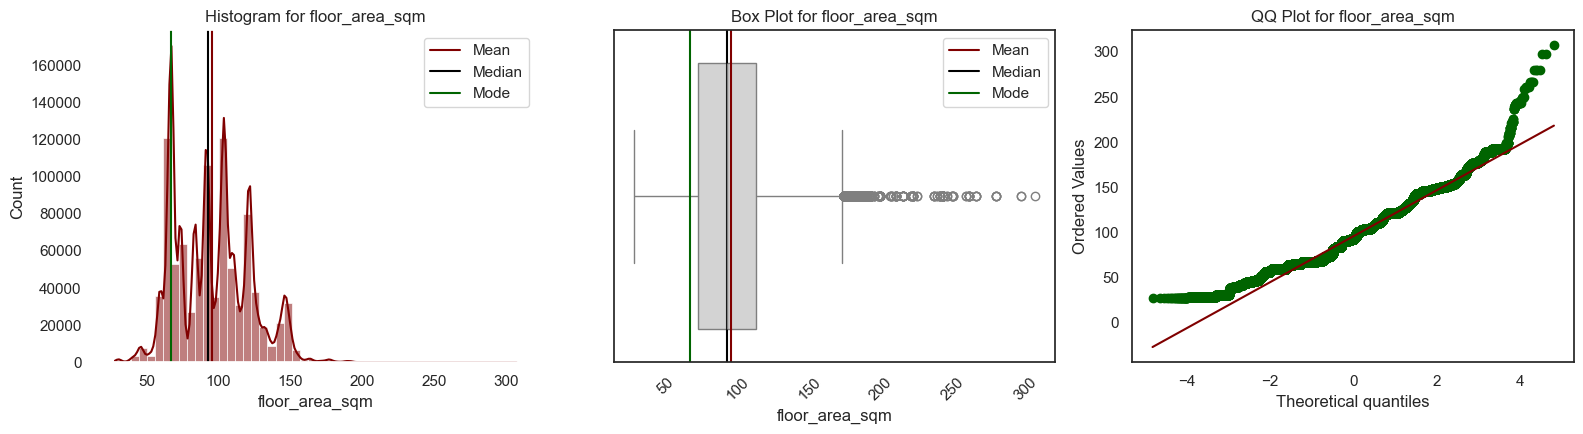



Skew for floor_area_sqm is 0.3661
Kurtosis for floor_area_sqm is -0.3464




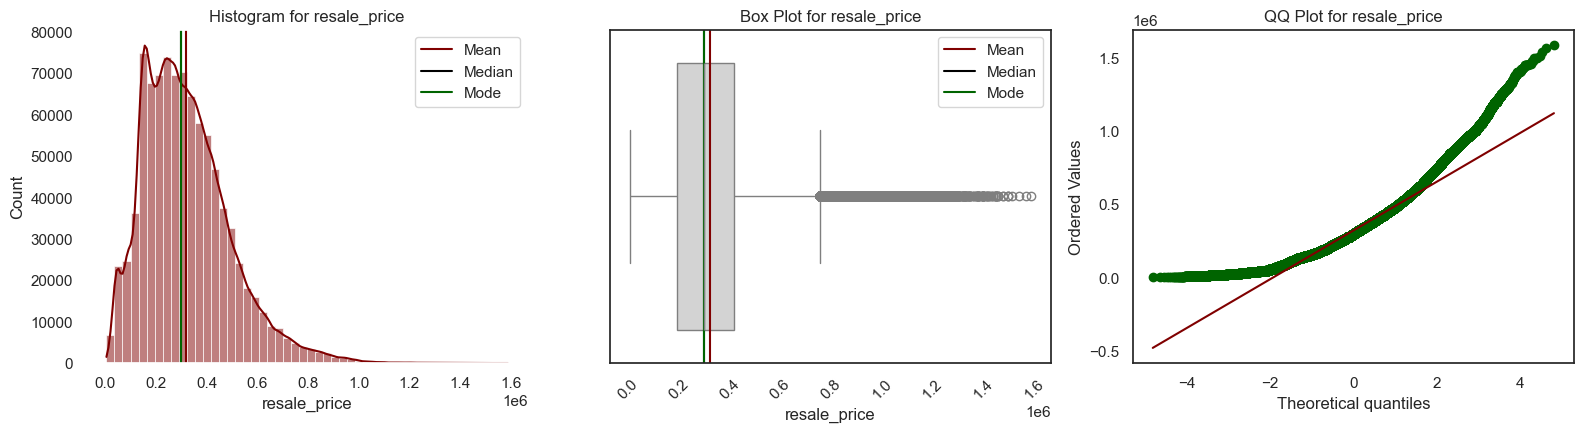



Skew for resale_price is 0.9422
Kurtosis for resale_price is 1.3735




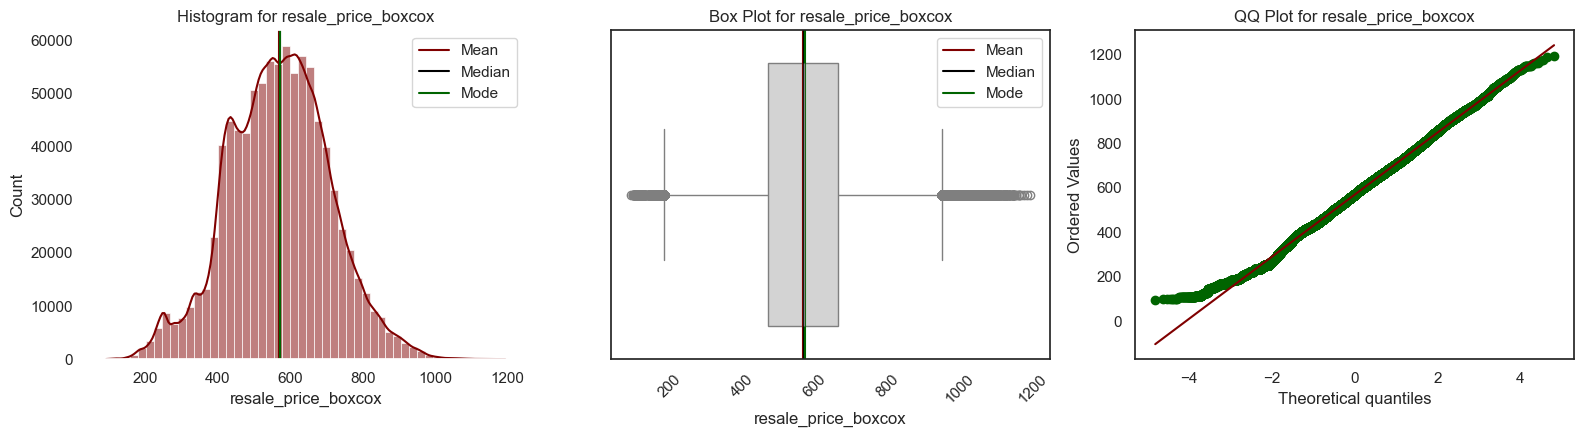



Skew for resale_price_boxcox is -0.0006
Kurtosis for resale_price_boxcox is 0.0481




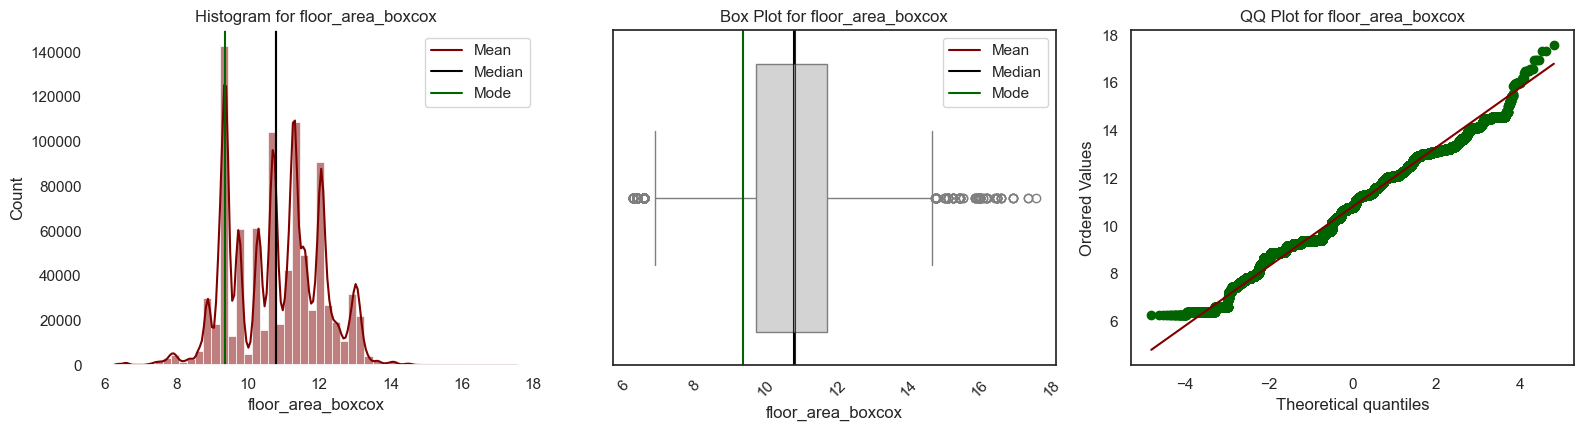



Skew for floor_area_boxcox is -0.0167
Kurtosis for floor_area_boxcox is -0.5553




In [68]:
skewed_col = []


for i in continuous:
    univar_num(df1,i) 
    skew_val = df1[i].skew()
    kurt=df1[i].kurtosis()
    kurt_color = kurtosis_color(kurt)
    color = skewness_color(skew_val)
    skewed_col.append(i)

    print(f"\n\n{color}Skew for {i} is {skew_val:.4f}{color_neutral}")
    print(f"{color}Kurtosis for {i} is {kurt:.4f}{color_neutral}\n\n")

<span style="color: Chartreuse;">   &#9784; &nbsp;</span> <span style="color: Tomato;font-size: 130%"> <u>**Floor Area SQM - Observations**</u></span><br><br><span Style="color: DodgerBlue;font-size: 120%">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#9830; </span> <span Style="color: white;font-size: 110%">After the Box-Cox transformation we can see a significant reduction in the Skewness. (almost 96%) addressed 95. </span><br>

<span Style="color: DodgerBlue;font-size: 120%">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#9830; </span> <span Style="color: white;font-size: 110%">The Box-Cox transformation slightly increased the negative kurtosis, indicating that the tails became even lighter. This might not be a significant concern. We will experiment the model's result and address this if we face any issues.  </span><br>

<span style="color: Chartreuse;">   &#9784; &nbsp;</span> <span style="color: Tomato;font-size: 130%"> <u>**Resale Price - Observations**</u></span><br><br><span Style="color: DodgerBlue;font-size: 120%">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &#9830;  </span> <span Style="color: white;font-size: 110%">The Box-Cox transformation appears to have been highly effective for Resale Price.</span><br>

### <span style="color:Khaki;">Outliers based on the Categorical Features:

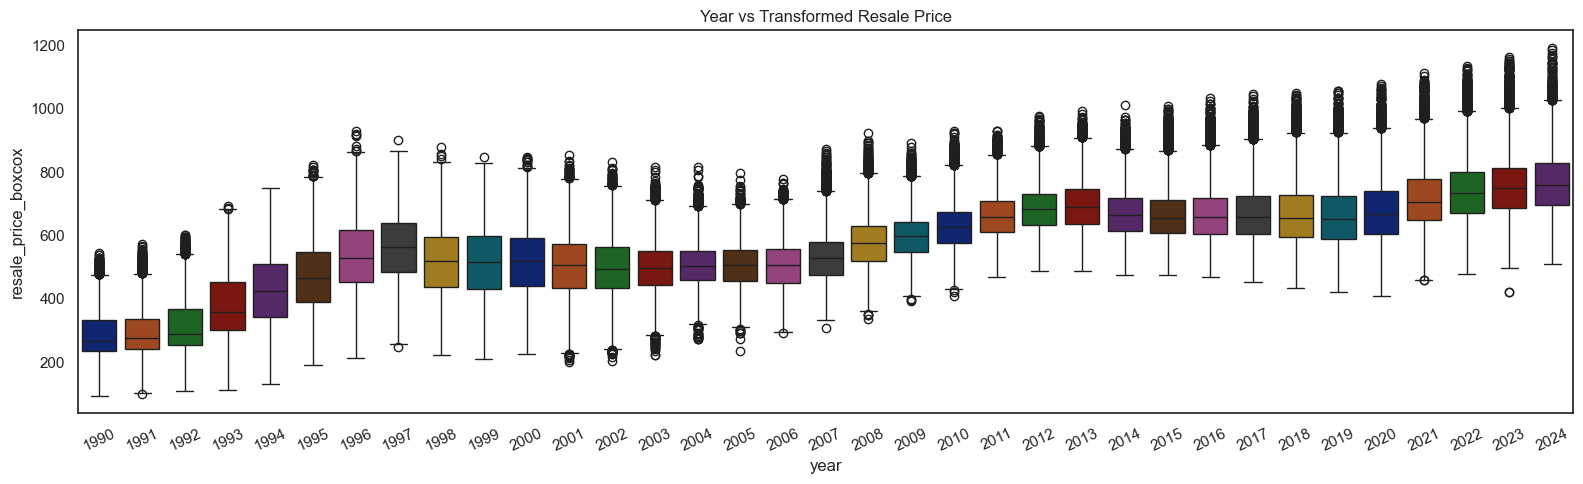

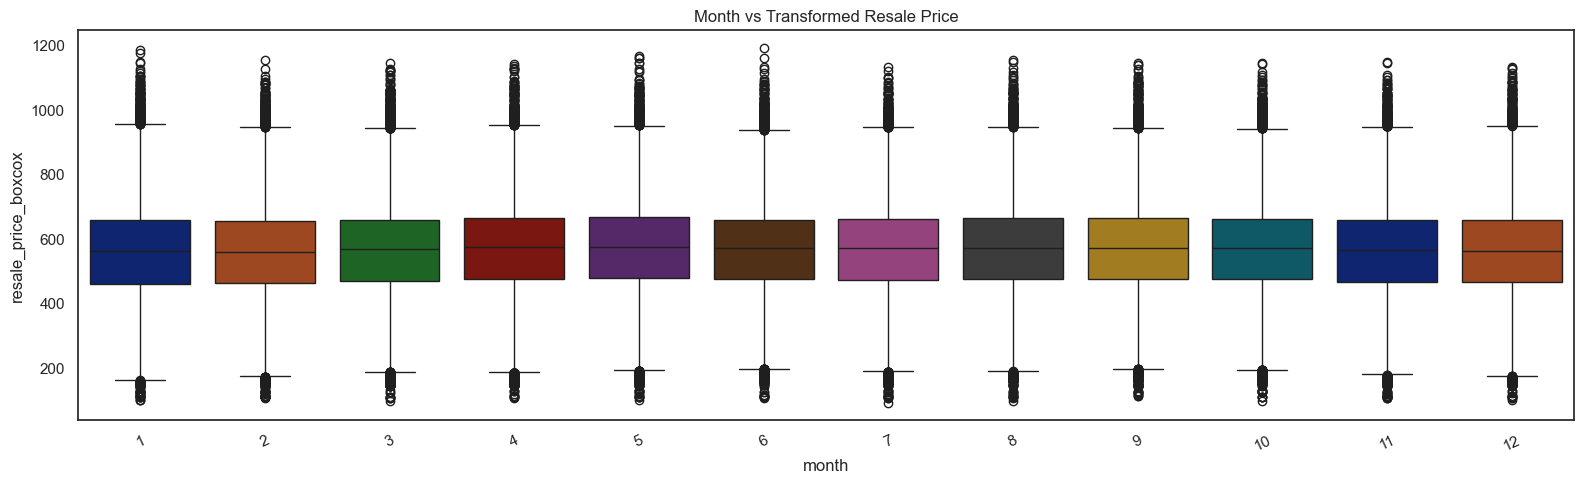

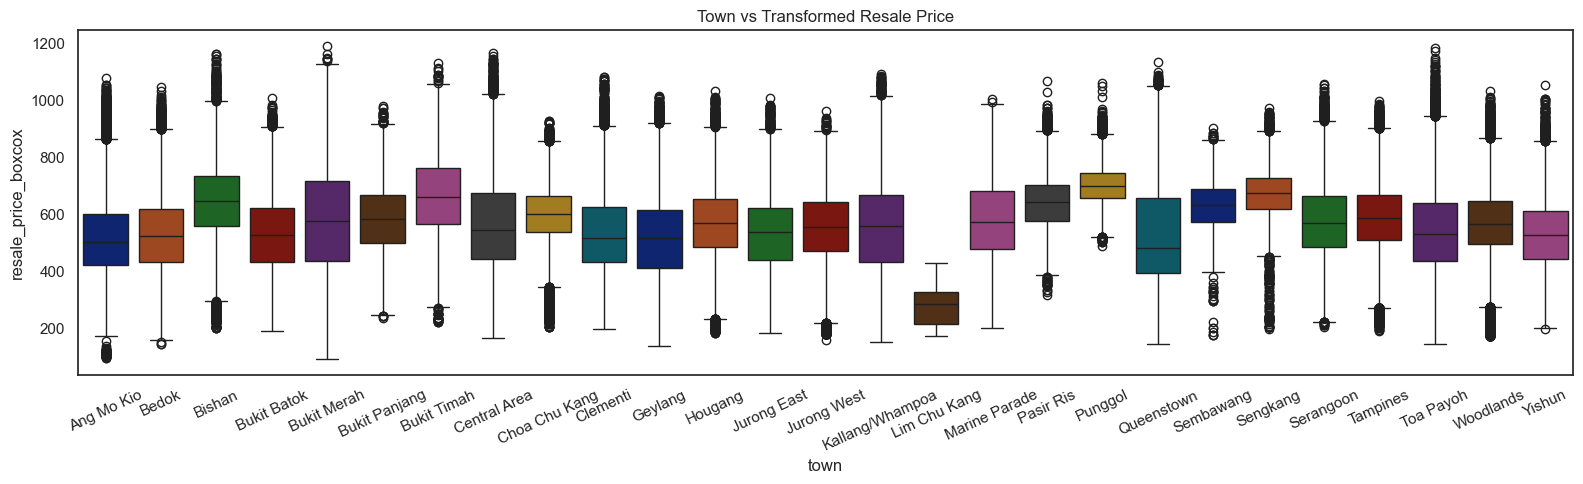

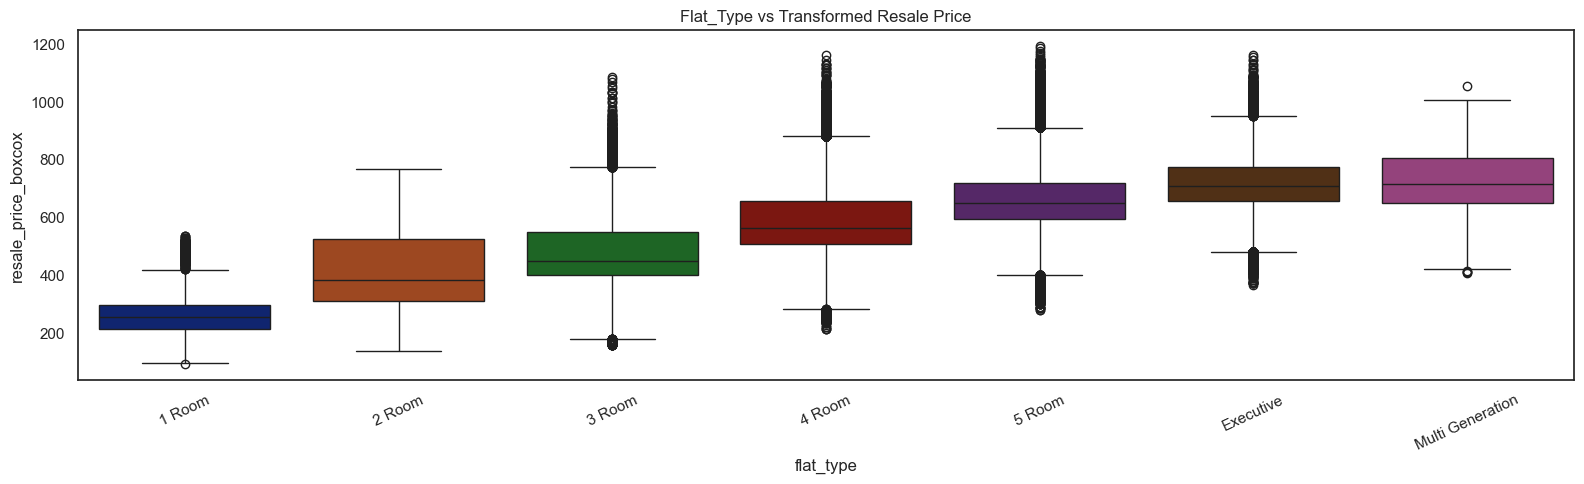

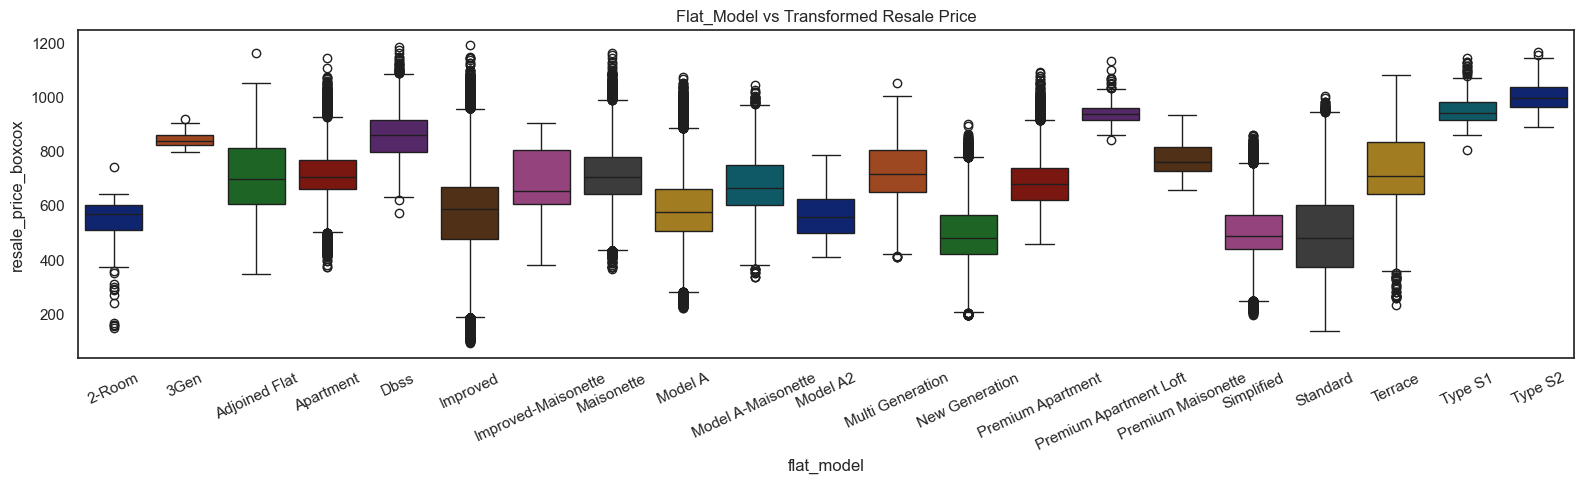

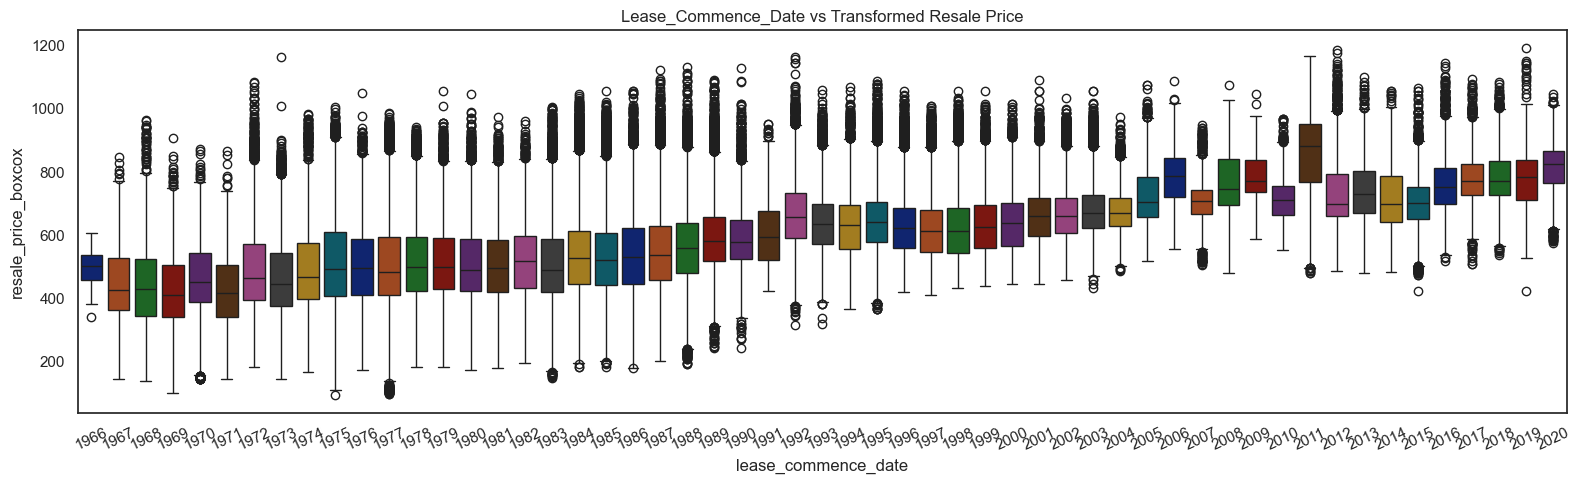

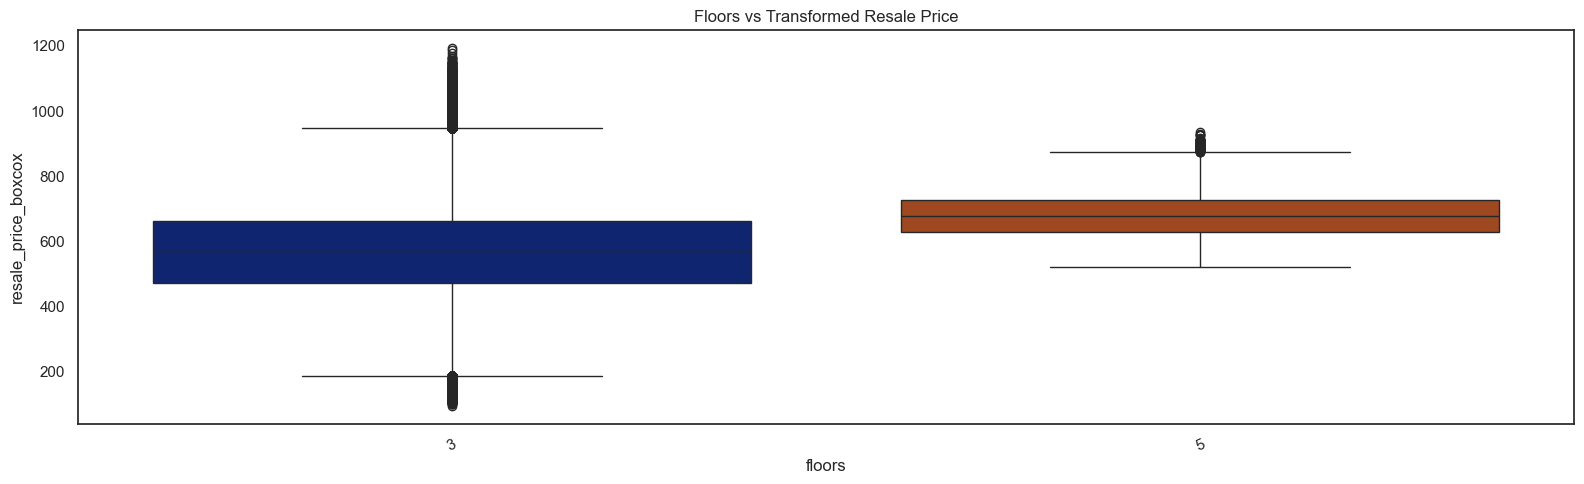

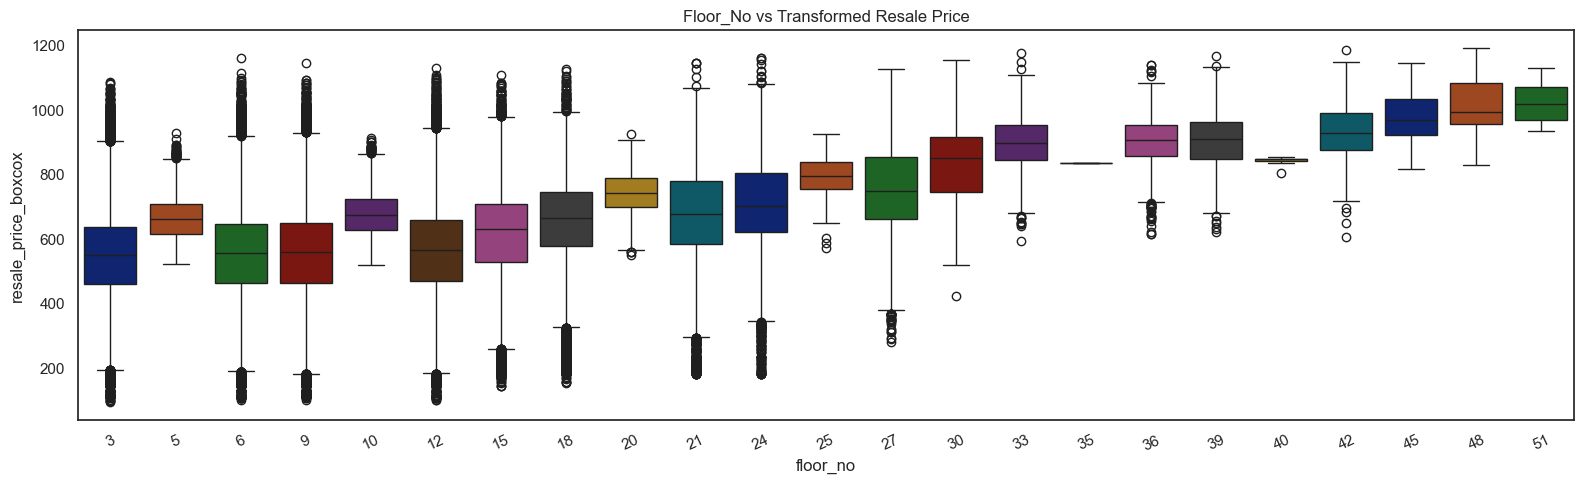

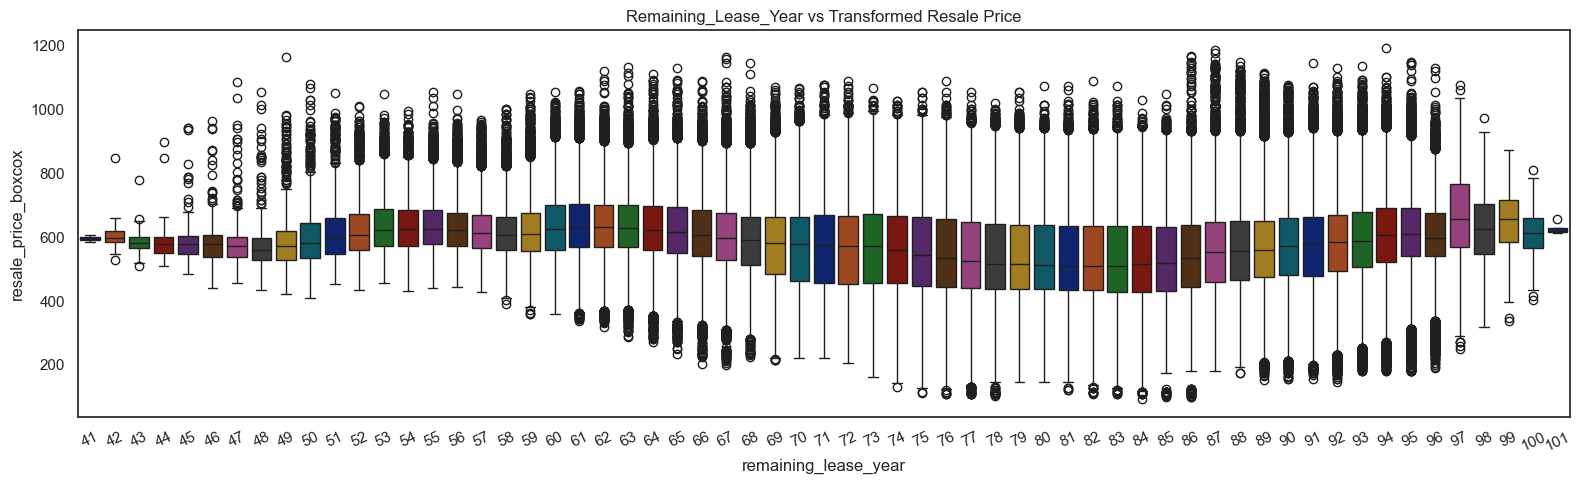

In [70]:
for i in categorical:
    plt.figure(figsize=(16,5))
    sns.boxplot(data=df1,x=i,y="resale_price_boxcox",hue=i,palette='dark',legend=False)
    plt.xticks(rotation=25)
    plt.title(f'{i.title()} vs Transformed Resale Price')
    plt.tight_layout()
    plt.show()

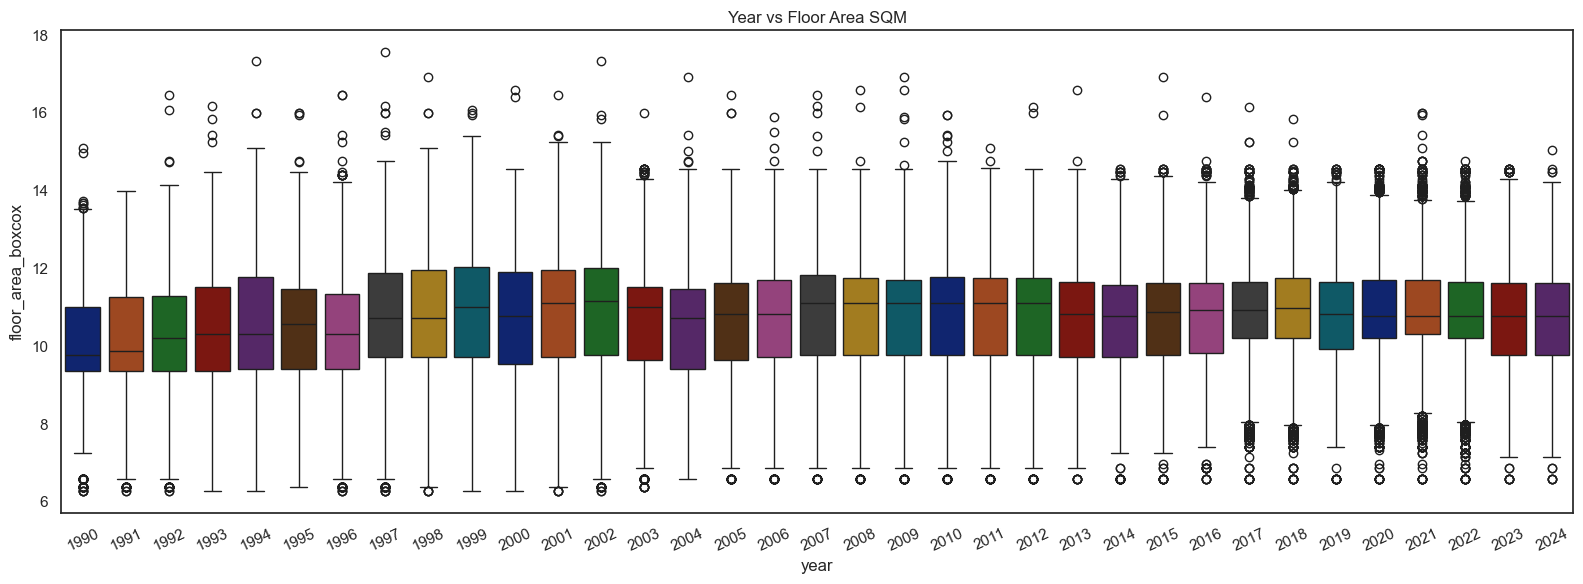

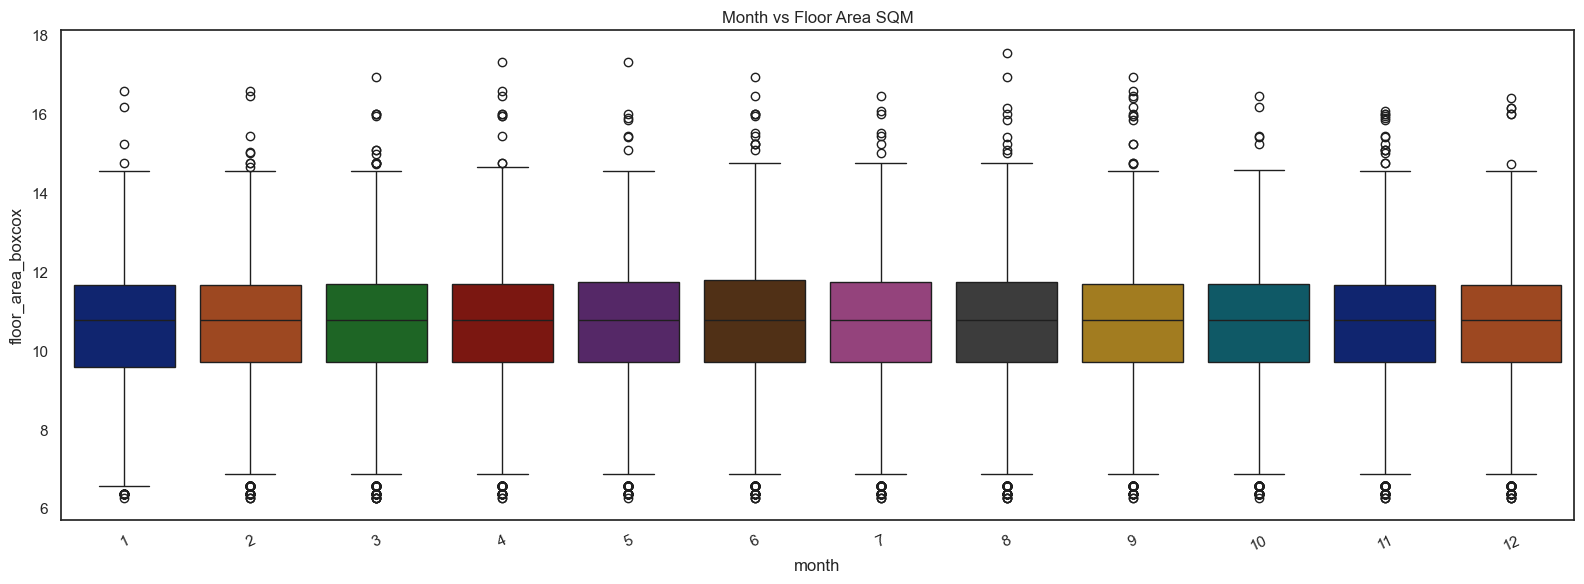

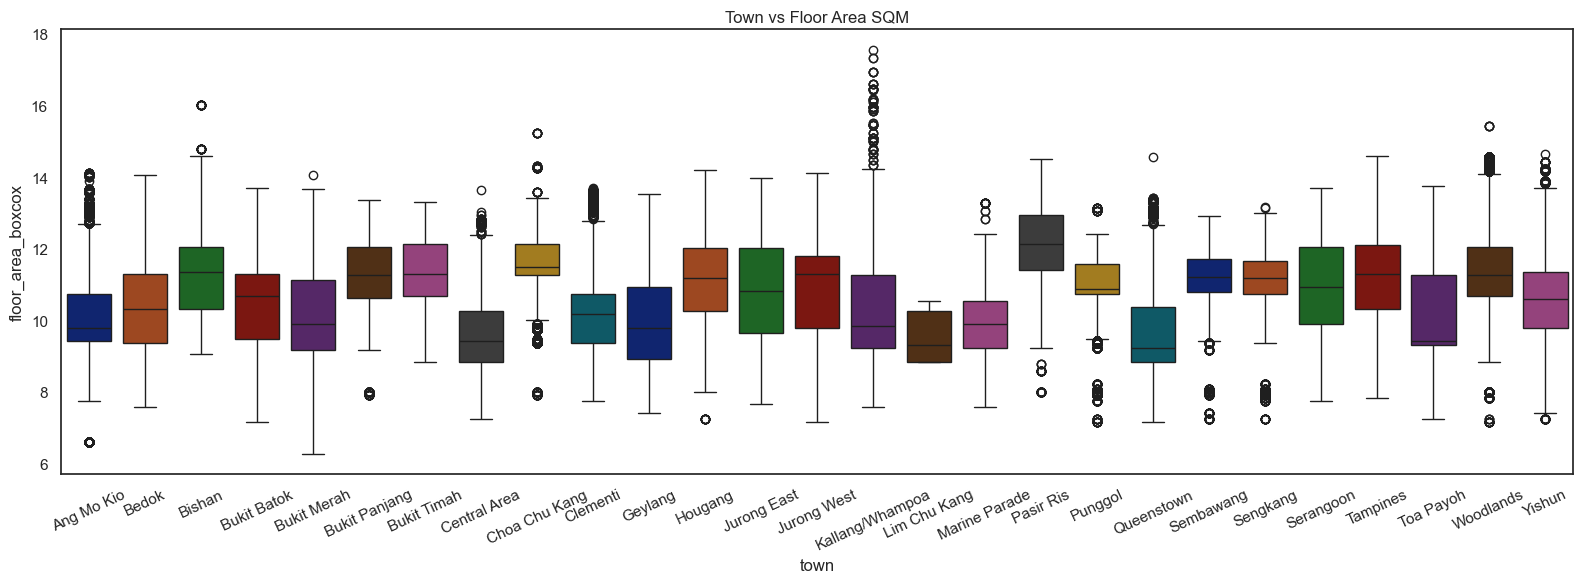

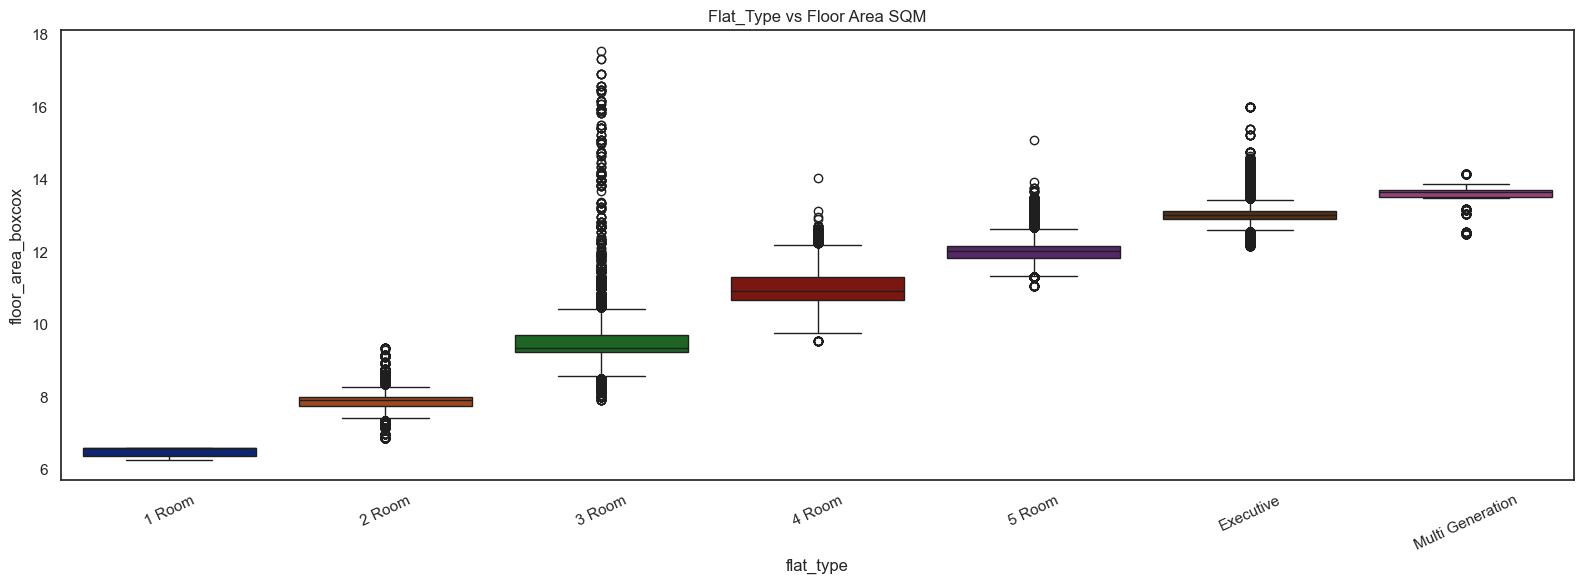

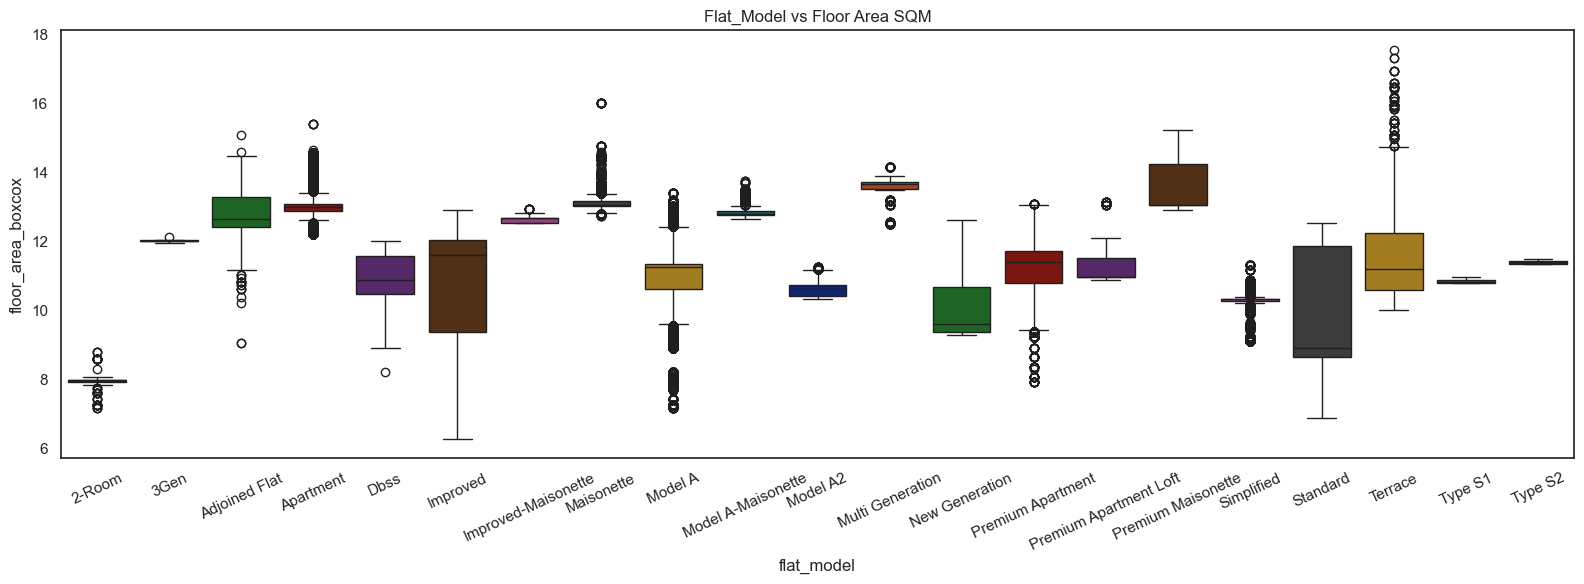

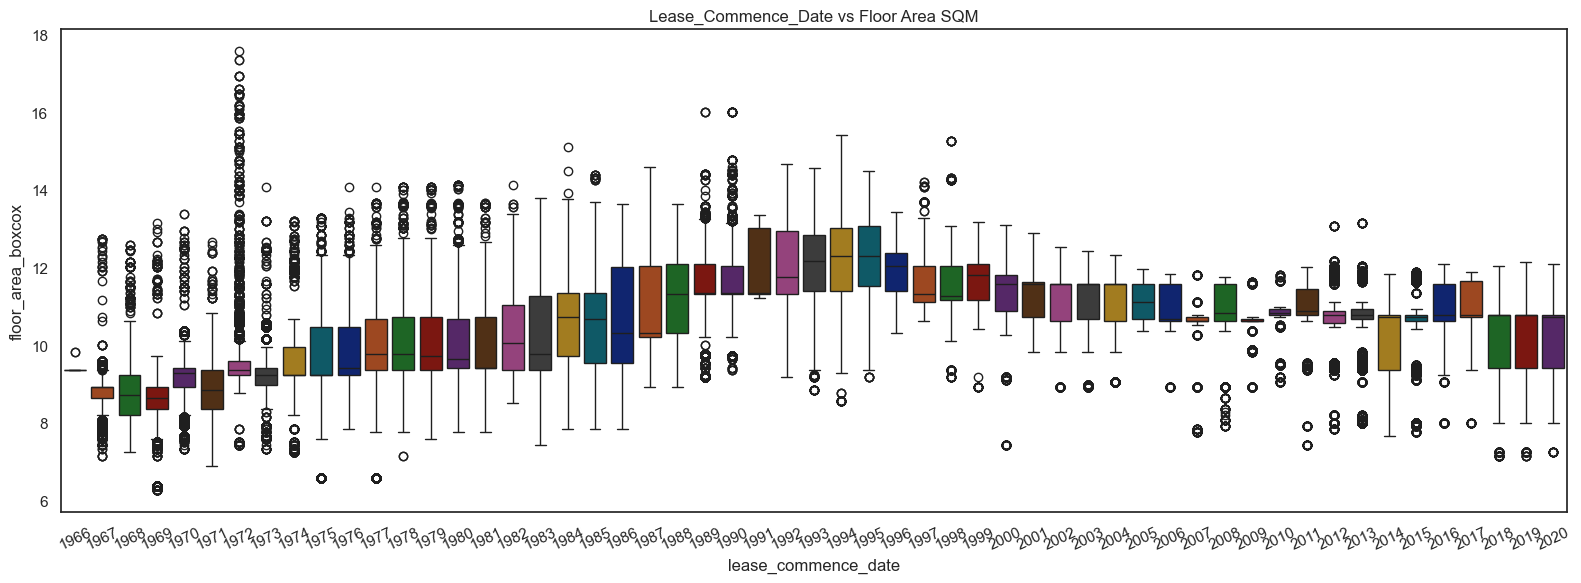

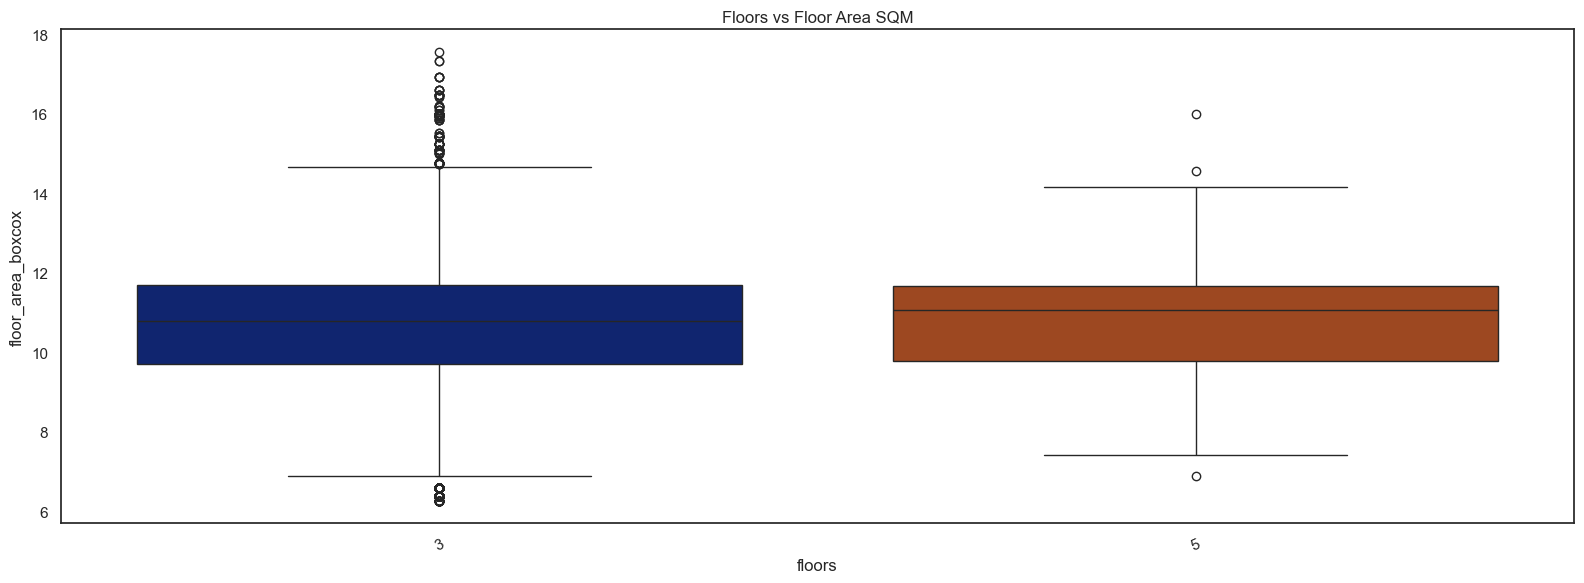

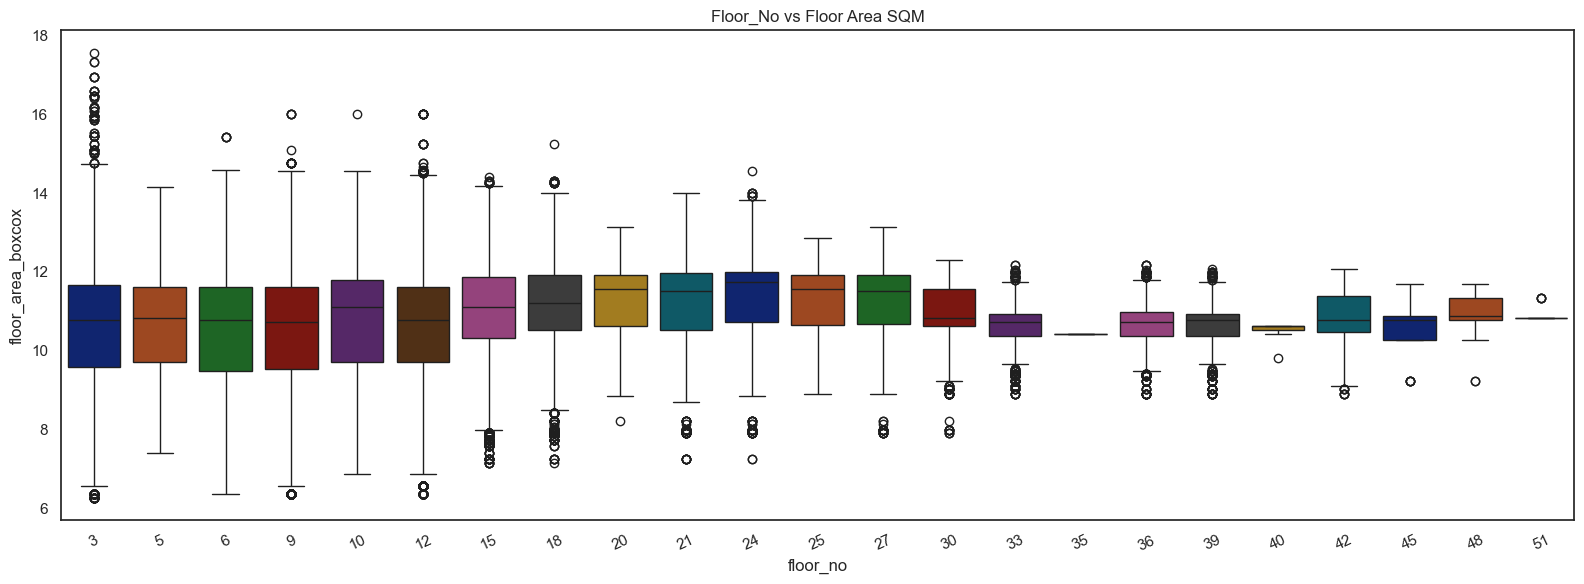

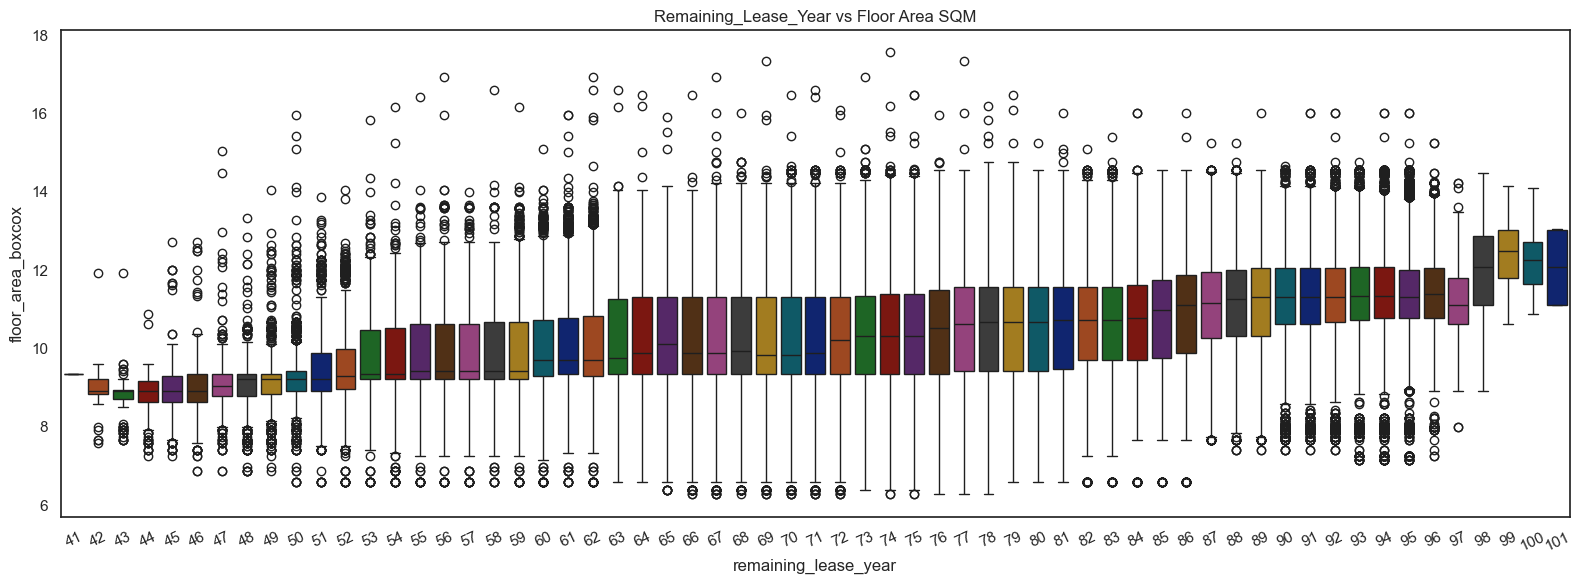

In [71]:
for i in categorical:
    plt.figure(figsize=(16,6))
    sns.boxplot(data=df1,x=i,y="floor_area_boxcox",hue=i,palette='dark',legend=False,)
    plt.xticks(rotation=25)
    plt.title(f'{i.title()} vs Floor Area SQM')
    plt.tight_layout()
    plt.show()

<span style="color: Chartreuse;font-size:150%">   &#9784; </span> <span style="color: Tomato;font-size: 120%;background-color:"> **After data transformation we can see a distribution movement that spread outliers in the lower side as well as upper side. All of these data points are not an error it shows the higher floor area sqm, floor level, flat type and model that influencing the resae price.**</span>

In [25]:
for cat_var in categorical:
    analyze_categorical_relationship(df1, "resale_price_boxcox", cat_var)

NameError: name 'analyze_categorical_relationship' is not defined

In [76]:
for cat_var in categorical:
    analyze_categorical_relationship(df1, "floor_area_boxcox", cat_var)

Relationship between floor_area_boxcox and year:
ANOVA: F-statistic = 394.0159, p-value = 0.0000
year has 1.42% significance with floor_area_boxcox
There is a statistically significant relationship between year and floor_area_boxcox.

Relationship between floor_area_boxcox and month:
ANOVA: F-statistic = 20.2982, p-value = 0.0000
month has 0.02% significance with floor_area_boxcox
There is a statistically significant relationship between month and floor_area_boxcox.

Relationship between floor_area_boxcox and town:
ANOVA: F-statistic = 8968.9425, p-value = 0.0000
town has 20.09% significance with floor_area_boxcox
There is a statistically significant relationship between town and floor_area_boxcox.

Relationship between floor_area_boxcox and flat_type:
ANOVA: F-statistic = 1597598.9064, p-value = 0.0000
flat_type has 91.18% significance with floor_area_boxcox
There is a statistically significant relationship between flat_type and floor_area_boxcox.

Relationship between floor_area_boxc

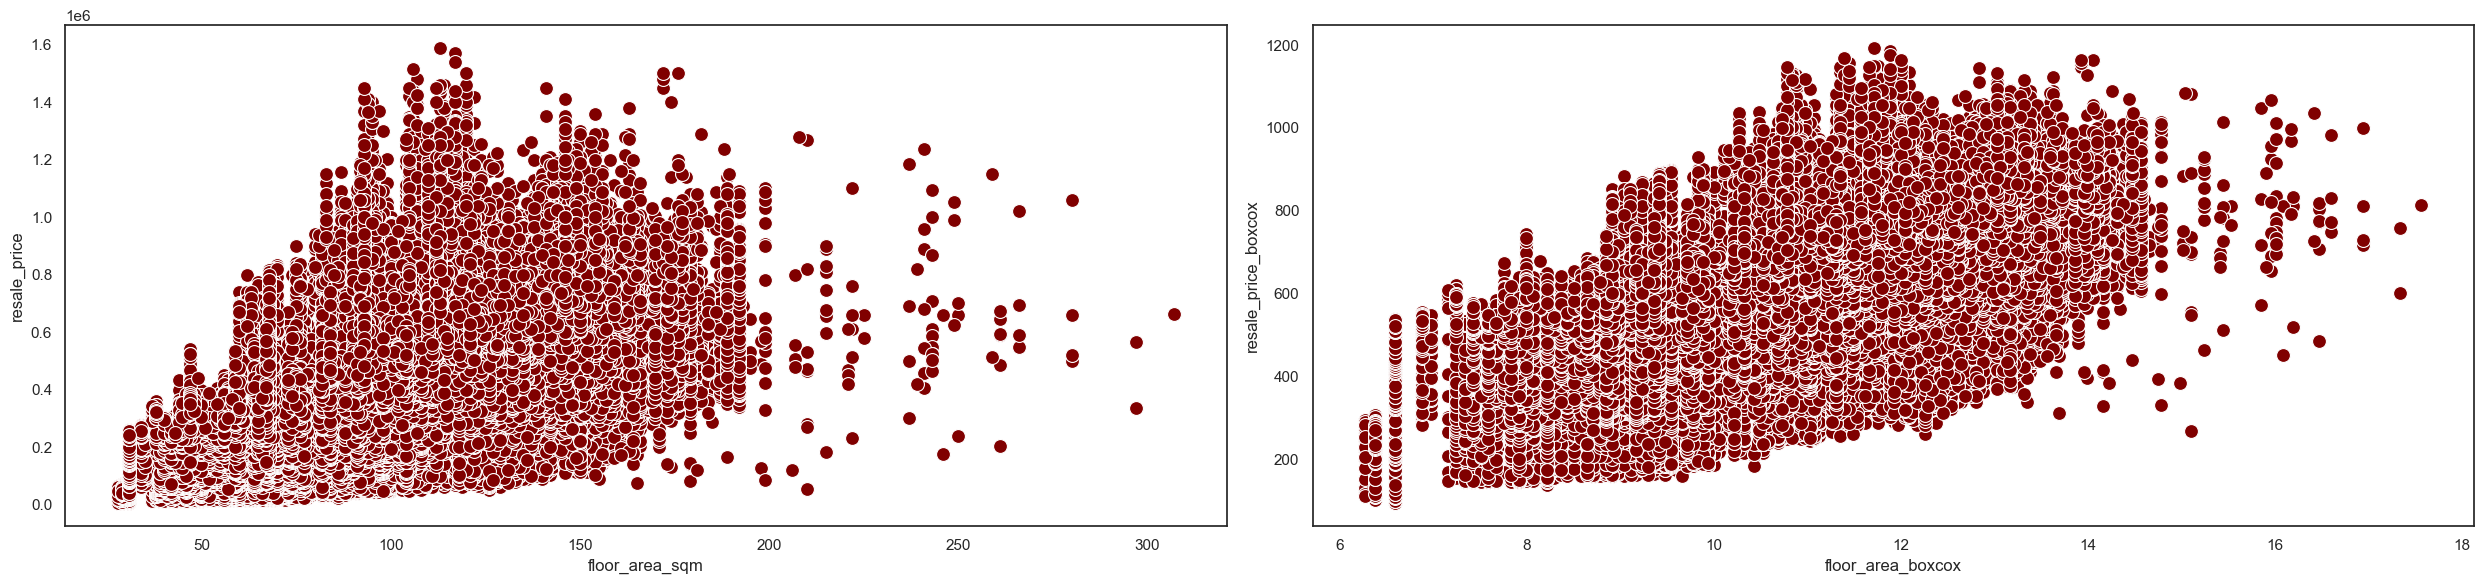

In [90]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df1, x='floor_area_sqm', y="resale_price", color='maroon',s=100)

plt.subplot(1,2,2)
sns.scatterplot(data=df1, x='floor_area_boxcox', y="resale_price_boxcox", color='maroon',s=100)
plt.tight_layout()
plt.show()

<span style="color: Chartreuse;font-size:150%">   &#9784; </span> <span style="color: Tomato;font-size: 120%;background-color:"> **We can oberseve that the top and bottom area data points reduced and formed almost like a linear relationship.**</span>

### <span style="color:Khaki;">Relationship Between Categorical Features and Target</span>

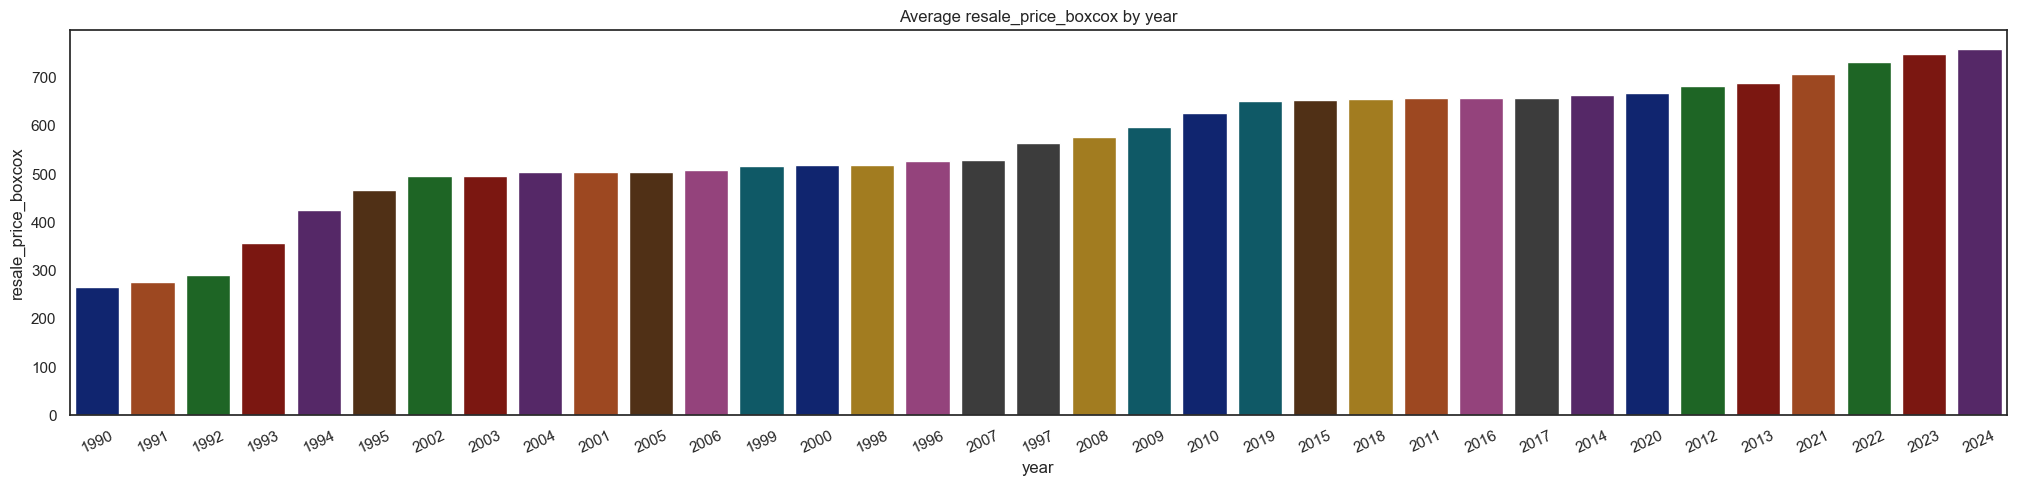

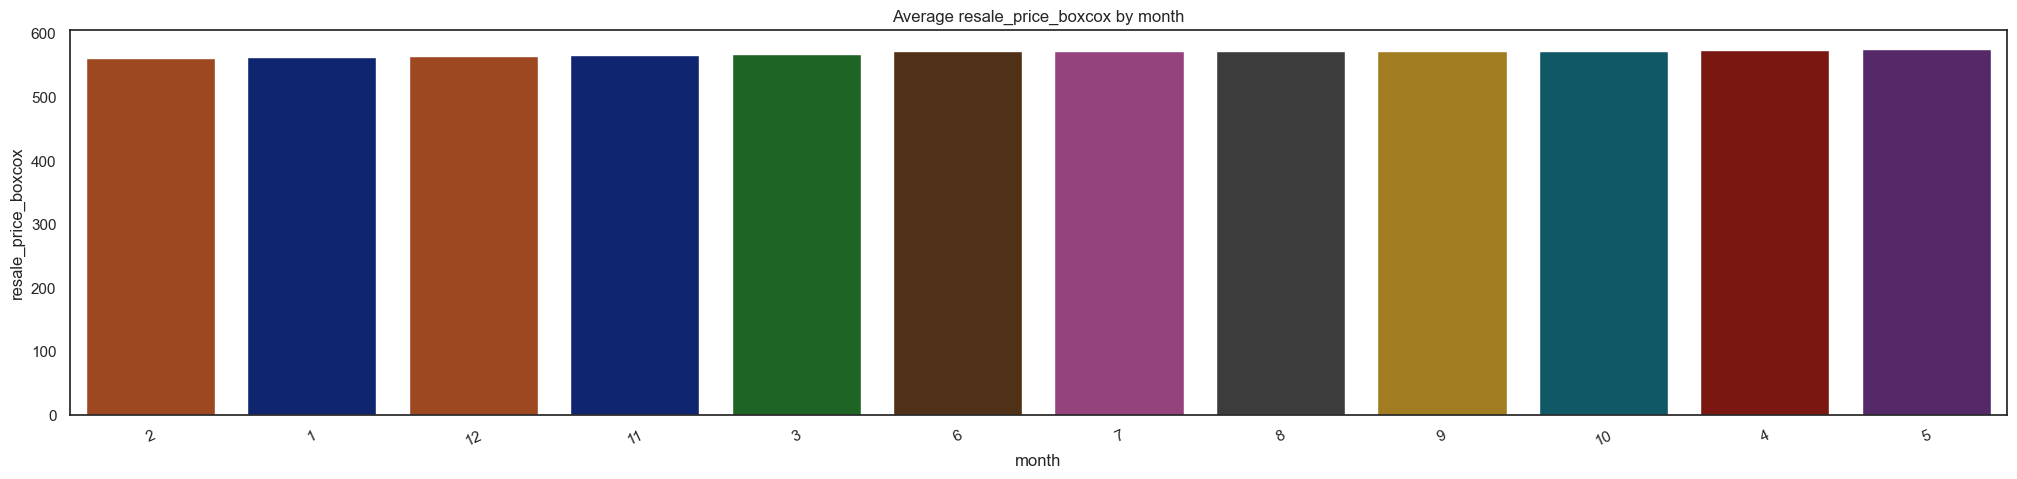

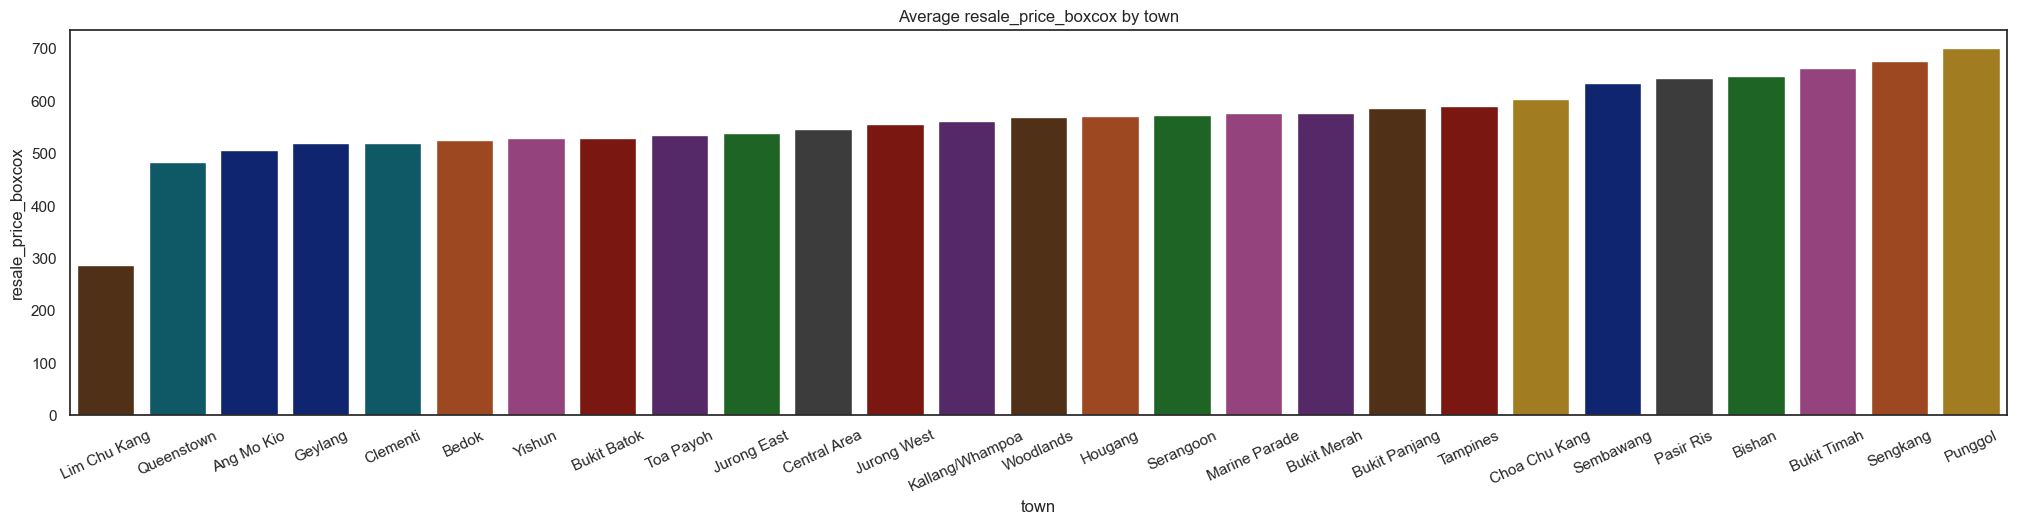

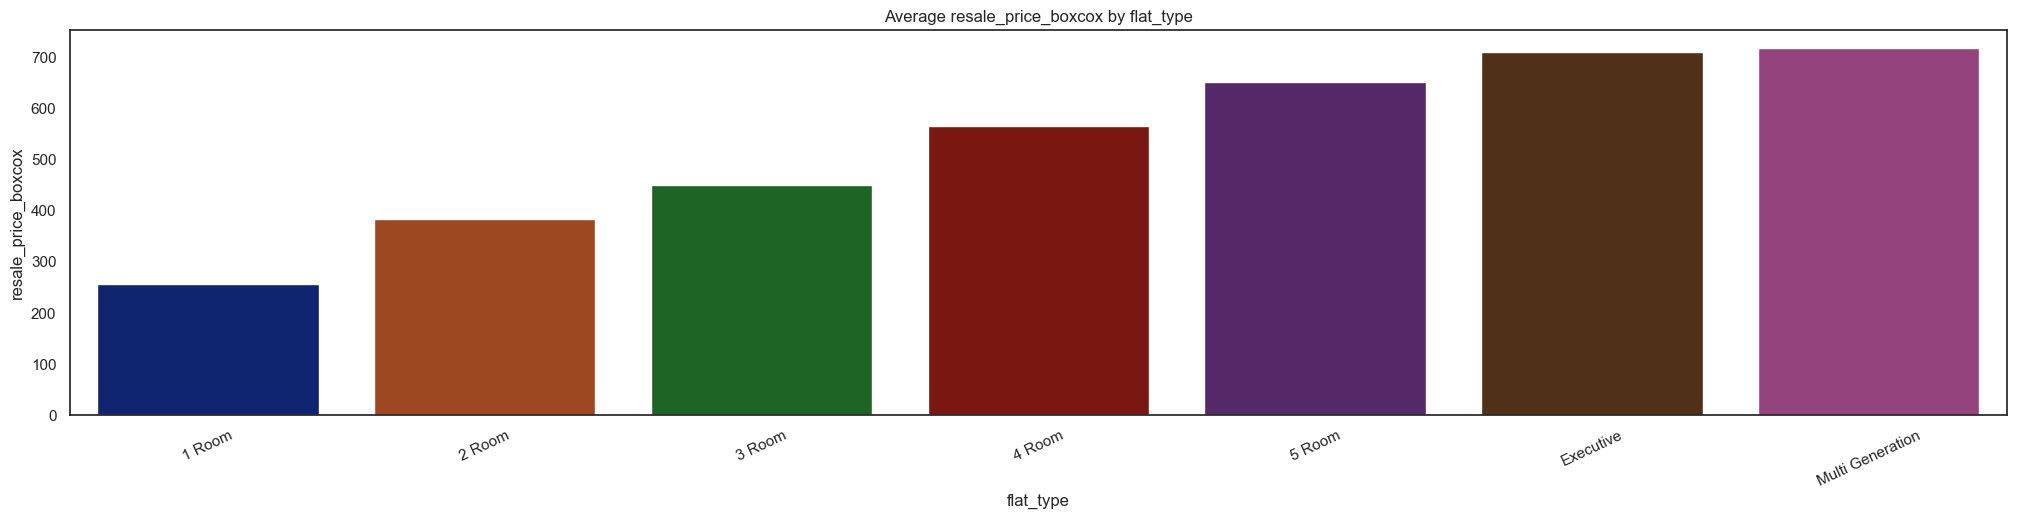

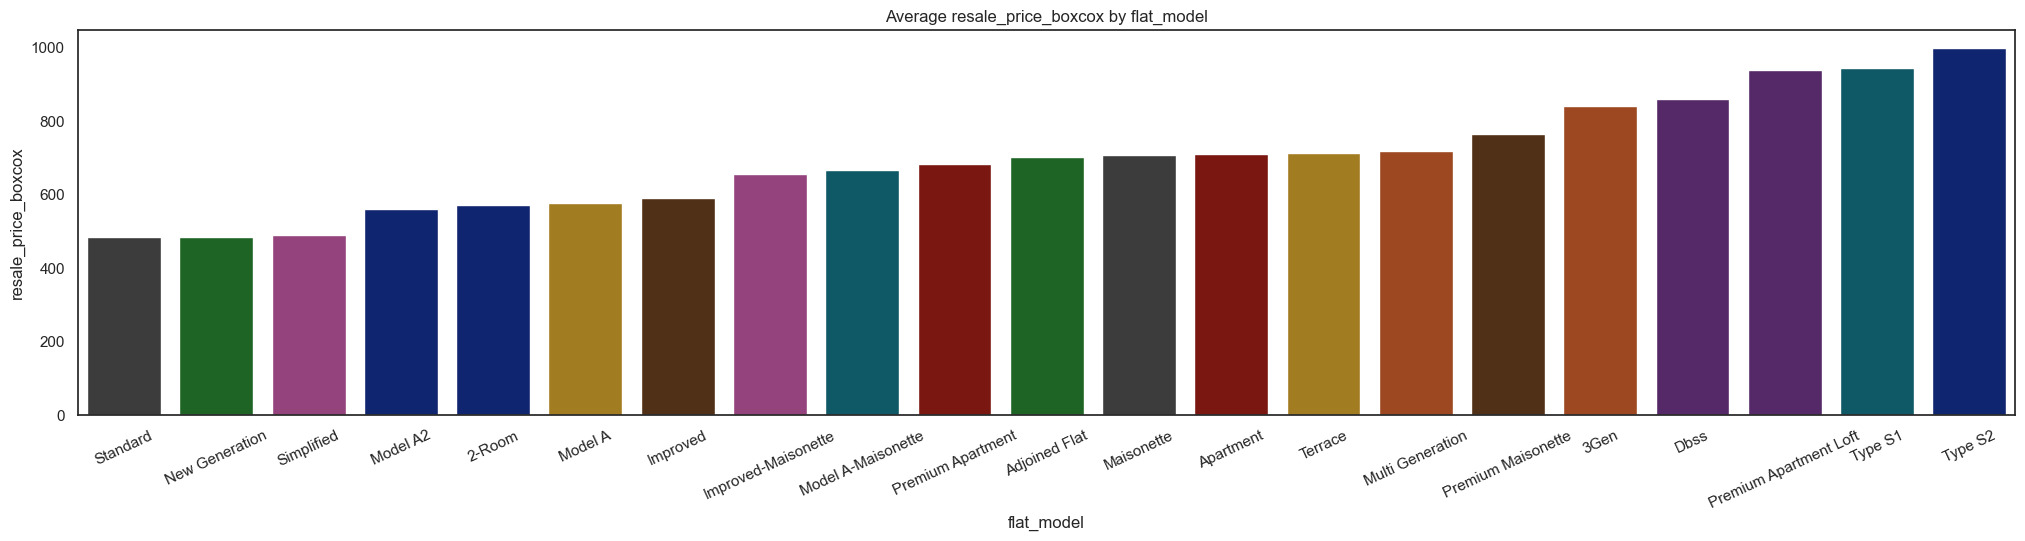

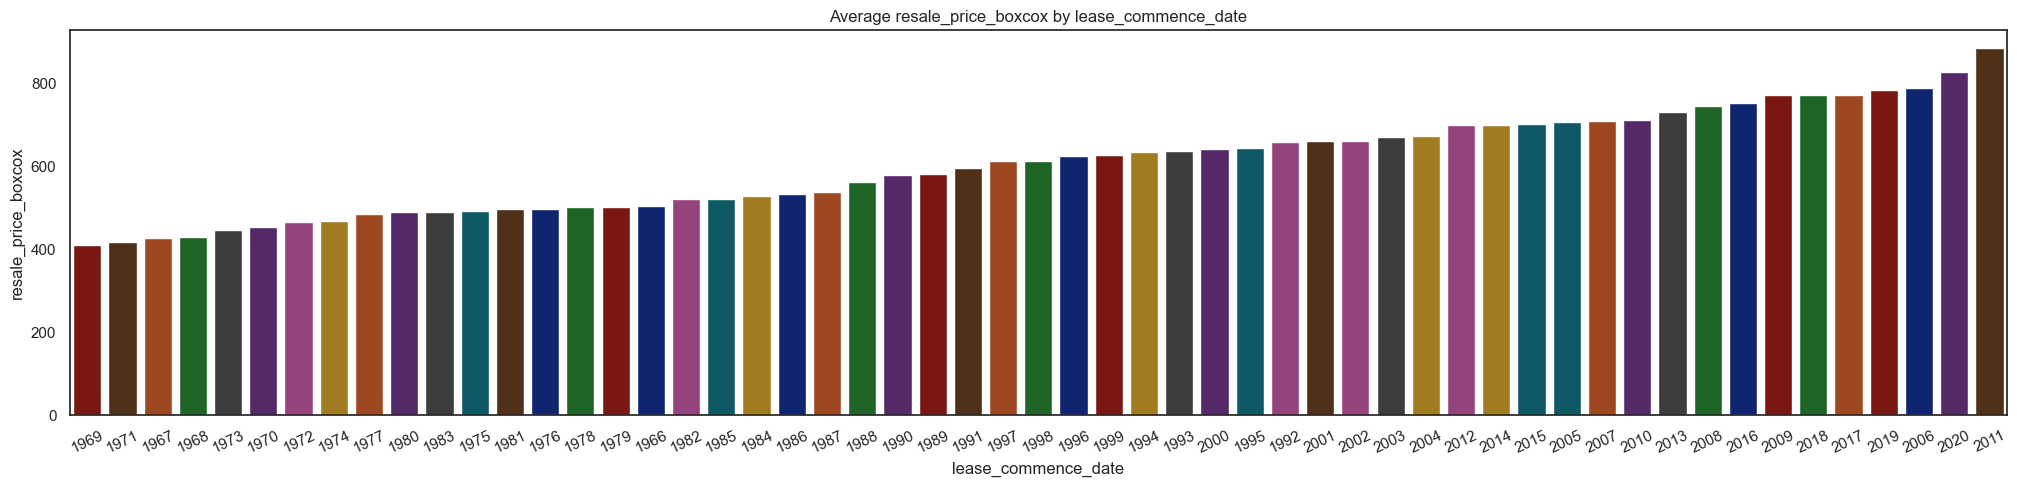

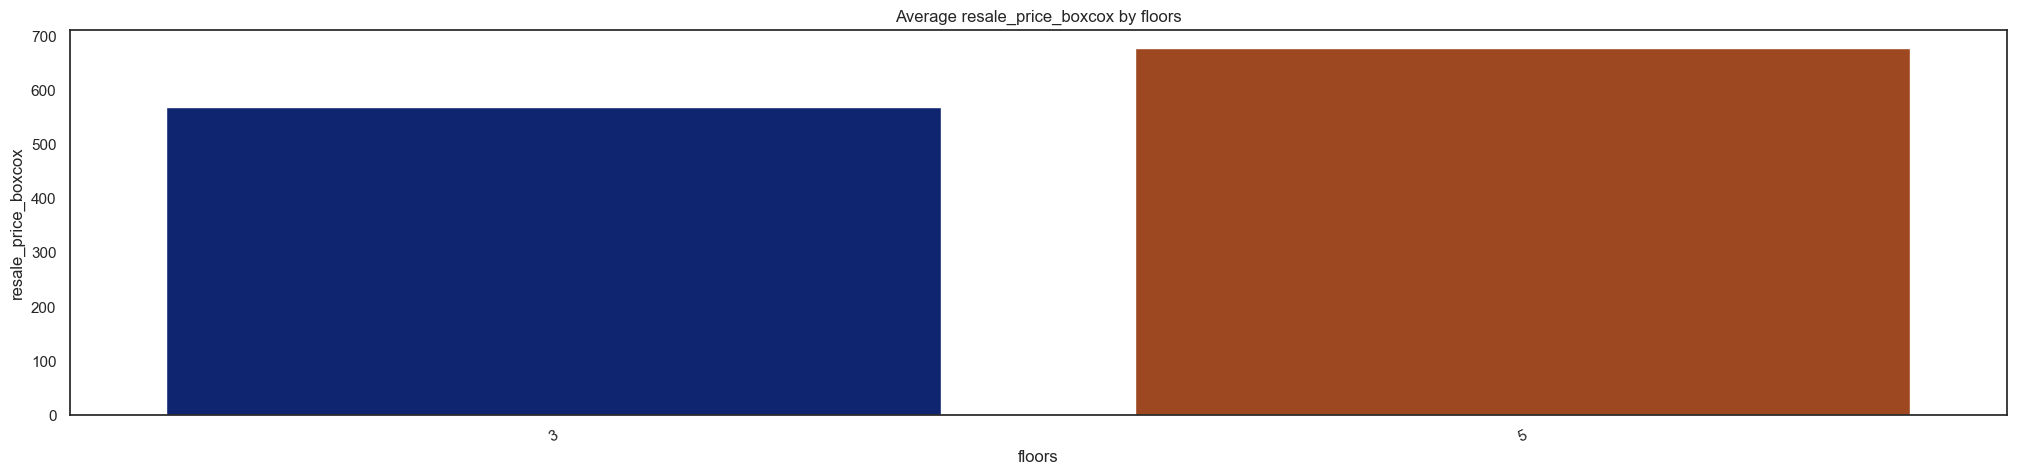

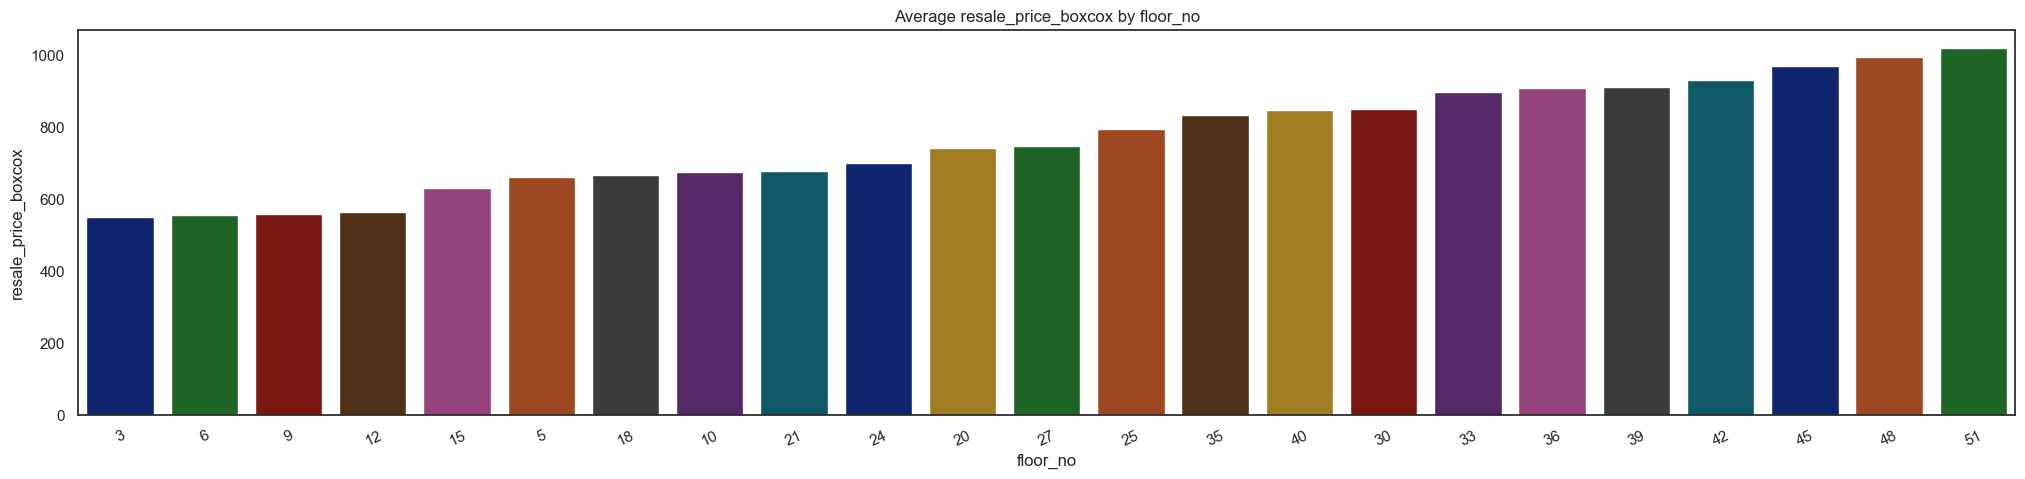

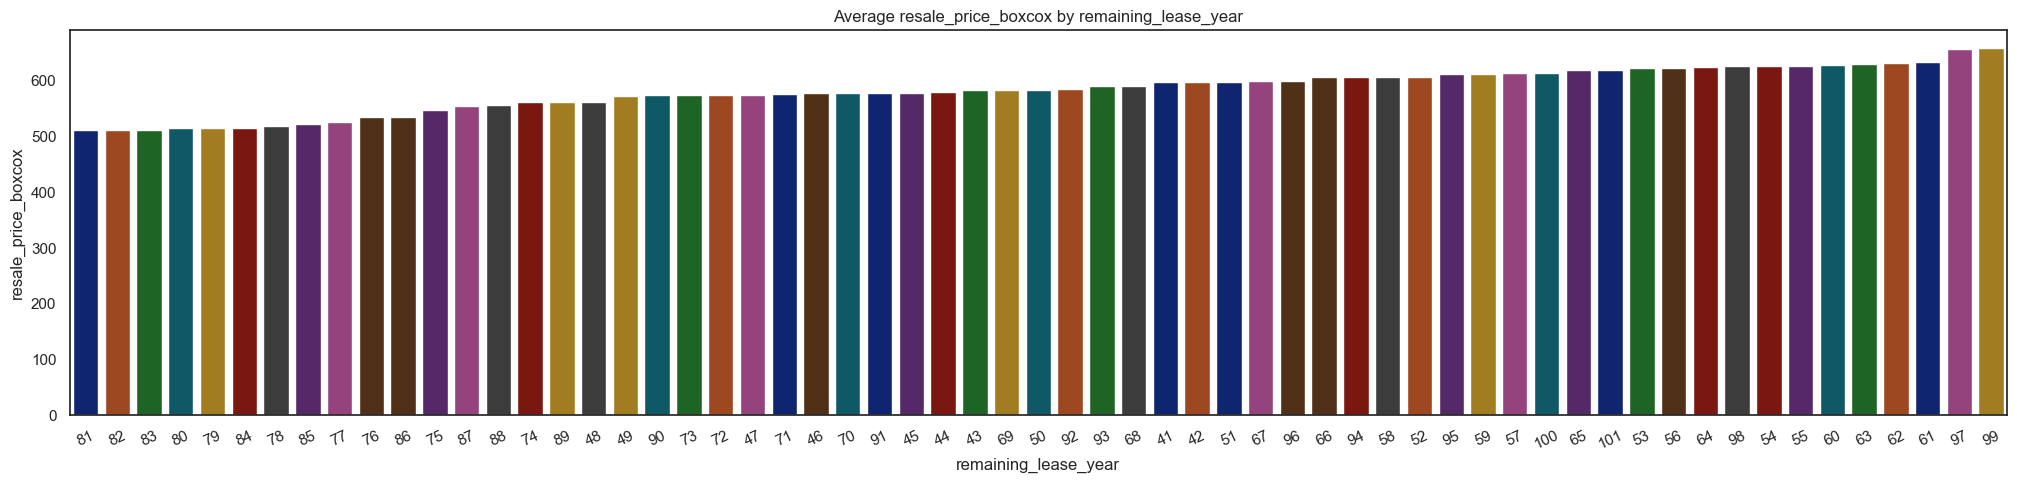

In [91]:
for i in categorical:
    plt.figure(figsize=(25, 5))
    data=df1.groupby(i,observed=False)['resale_price_boxcox'].median().reset_index().sort_values('resale_price_boxcox')
    sns.barplot(data=data, x=data[i], y=data['resale_price_boxcox'],hue=i, order =data[i],legend=False,palette='dark',)
    plt.xticks(rotation=25)
    plt.title(f'Average resale_price_boxcox by {i}')
    plt.show()

<span Style="color: DodgerBlue;font-size: 130%;"> &#9830; </span> <span style="color: Tomato;font-size: 120%"> <b> Observations: </b> <br><span Style="color: DodgerBlue;font-size: 130%"> &nbsp;&nbsp;&nbsp;&nbsp; &#9830; </span><span style="color: white;font-size: 110%">I feel that the fluctuations are curved when comparing to the original plots.</span>

### <p Style="color: Khaki">Correlation - Pearson's and Spearman's </p>

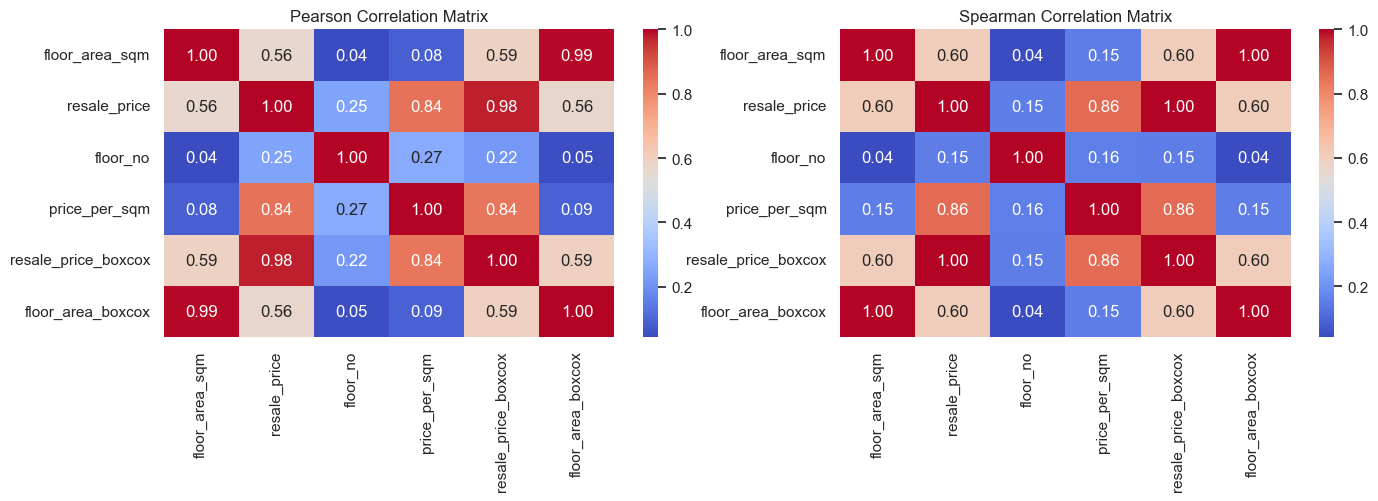

In [97]:
cor_col = df1.select_dtypes(include='number')
correlation_matrix_pear = cor_col.corr()
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.heatmap(correlation_matrix_pear,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Pearson Correlation Matrix')


cor_col = df1.select_dtypes(include='number')
correlation_matrix = cor_col.corr(method='spearman')
plt.subplot(1,2,2)
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

<span Style="color: DodgerBlue;font-size: 130%;"> &#9830; </span> <span style="color: Tomato;font-size: 120%"> <b> Observations: </b> <br><span Style="color: DodgerBlue;font-size: 130%"> &nbsp;&nbsp;&nbsp;&nbsp; &#9830; </span><span style="color: white;font-size: 110%">We do not see visible differences.</span>

## <span style="color:Khaki;"> Encoding Categorical Features:</span> 

In [138]:
town_en = df1.groupby('town',observed=False)['resale_price_boxcox'].median().rank(method='first').reset_index().sort_values('resale_price_boxcox')
town_en_list = dict(zip(town_en['town'], town_en['resale_price_boxcox'].astype(int)))
print(town_en_list)

{'Lim Chu Kang': 1, 'Queenstown': 2, 'Ang Mo Kio': 3, 'Clementi': 4, 'Geylang': 5, 'Bedok': 6, 'Bukit Batok': 7, 'Yishun': 8, 'Toa Payoh': 9, 'Jurong East': 10, 'Central Area': 11, 'Jurong West': 12, 'Kallang/Whampoa': 13, 'Woodlands': 14, 'Hougang': 15, 'Serangoon': 16, 'Marine Parade': 17, 'Bukit Merah': 18, 'Bukit Panjang': 19, 'Tampines': 20, 'Choa Chu Kang': 21, 'Sembawang': 22, 'Pasir Ris': 23, 'Bishan': 24, 'Bukit Timah': 25, 'Sengkang': 26, 'Punggol': 27}


In [149]:
df1['town_en'] = df1['town'].map(town_en_list)
df1['town_en'] = df1['town_en'].astype('int8')

In [125]:
year_en = df1.groupby('year',observed=False)['resale_price_boxcox'].median().rank(method='first').reset_index().sort_values('resale_price_boxcox')
year_en_list = dict(zip(year_en['year'], year_en['resale_price_boxcox'].astype(int)))
print(year_en_list)

{1990: 1, 1991: 2, 1992: 3, 1993: 4, 1994: 5, 1995: 6, 2002: 7, 2003: 8, 2004: 9, 2001: 10, 2005: 11, 2006: 12, 1999: 13, 2000: 14, 1998: 15, 1996: 16, 2007: 17, 1997: 18, 2008: 19, 2009: 20, 2010: 21, 2019: 22, 2015: 23, 2018: 24, 2011: 25, 2016: 26, 2017: 27, 2014: 28, 2020: 29, 2012: 30, 2013: 31, 2021: 32, 2022: 33, 2023: 34, 2024: 35}


In [147]:
df1['year_en'] = df1['year'].map(year_en_list)
df1['year_en'] = df1['year_en'].astype('int8')

In [129]:
flat_type_en = df1.groupby('flat_type',observed=False)['resale_price_boxcox'].median().rank(method='first').reset_index().sort_values('resale_price_boxcox')
flat_type_en_list = dict(zip(flat_type_en['flat_type'], flat_type_en['resale_price_boxcox'].astype(int)))
print(flat_type_en_list)

{'1 Room': 1, '2 Room': 2, '3 Room': 3, '4 Room': 4, '5 Room': 5, 'Executive': 6, 'Multi Generation': 7}


In [150]:
df1['flat_type_en'] = df1['flat_type'].map(flat_type_en_list)
df1['flat_type_en'] = df1['flat_type_en'].astype('int8')

In [132]:
flat_model_en = df1.groupby('flat_model',observed=False)['resale_price_boxcox'].median().rank(method='first').reset_index().sort_values('resale_price_boxcox')
flat_model_en_list = dict(zip(flat_model_en['flat_model'], flat_model_en['resale_price_boxcox'].astype(int)))
print(flat_model_en_list)

{'New Generation': 1, 'Standard': 2, 'Simplified': 3, 'Model A2': 4, '2-Room': 5, 'Model A': 6, 'Improved': 7, 'Improved-Maisonette': 8, 'Model A-Maisonette': 9, 'Premium Apartment': 10, 'Adjoined Flat': 11, 'Maisonette': 12, 'Apartment': 13, 'Terrace': 14, 'Multi Generation': 15, 'Premium Maisonette': 16, '3Gen': 17, 'Dbss': 18, 'Premium Apartment Loft': 19, 'Type S1': 20, 'Type S2': 21}


In [151]:
df1['flat_model_en'] = df1['flat_model'].map(flat_model_en_list)
df1['flat_model_en'] = df1['flat_model_en'].astype('int8')

In [27]:
lease_commence_en = df1.groupby('lease_commence_date',observed=False)['resale_price_boxcox'].median().rank(method='first').reset_index().sort_values('resale_price_boxcox')
lease_commence_en_list = dict(zip(lease_commence_en['flat_model'], lease_commence_en['resale_price_boxcox'].astype(int)))
print(lease_commence_en_list)

KeyError: 'Column not found: resale_price_boxcox'

In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927465 entries, 0 to 181261
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   month                 927465 non-null  category
 1   town                  927465 non-null  category
 2   flat_type             927465 non-null  category
 3   floor_area_sqm        927465 non-null  float64 
 4   flat_model            927465 non-null  category
 5   lease_commence_date   927465 non-null  category
 6   resale_price          927465 non-null  float64 
 7   floors                927465 non-null  category
 8   floor_no              927465 non-null  int8    
 9   year                  927465 non-null  category
 10  full_address          927465 non-null  category
 11  price_per_sqm         927465 non-null  float64 
 12  remaining_lease_year  927465 non-null  category
 13  resale_price_boxcox   927465 non-null  float64 
 14  floor_area_boxcox     927465 non-null  fl

In [153]:
for i in df1.columns:
    if '_en' in i:
        print(i)
        print(f"Max - {df1[i].max()}\n {df1[i].min()}" )
    else:
        print('else - ',i )

else -  month
else -  town
else -  flat_type
else -  floor_area_sqm
else -  flat_model
else -  lease_commence_date
else -  resale_price
else -  floors
else -  floor_no
else -  year
else -  full_address
else -  price_per_sqm
else -  remaining_lease_year
else -  resale_price_boxcox
else -  floor_area_boxcox
town_en
Max - 27
 1
year_en
Max - 35
 1
flat_type_en
Max - 7
 1
flat_model_en
Max - 21
 1


In [136]:
df1.sample(10)

month             town flat_type  floor_area_sqm      flat_model  \
41876      3          Hougang    5 Room        121.0000        Improved   
365265    12    Bukit Panjang    4 Room         85.0000        Model A2   
177128     4  Kallang/Whampoa    4 Room         94.0000  New Generation   
241476     3         Clementi    4 Room         91.0000  New Generation   
41081      2       Ang Mo Kio    5 Room        120.0000        Improved   
68357      4           Yishun    5 Room        121.0000        Improved   
23892      5            Bedok    4 Room         92.0000  New Generation   
27825      7    Choa Chu Kang    4 Room        110.0000         Model A   
364254    11       Queenstown    5 Room        111.0000        Improved   
126084     8       Queenstown    3 Room         65.0000        Improved   

       lease_commence_date  resale_price floors  floor_no  year  \
41876                 1987   330000.0000      3         6  2001   
365265                2002   395000.0000      3         6  2011   
177128                1981   568000.0000      3        12  2024   
241476                1981   246000.0000      3        12  1999   
41081                 1980   170000.0000      3         6  1993   
68357                 1987   253000.0000      3         9  1994   
23892                 1985   433000.0000      3         6  2016   
27825                 1990   353000.0000      3         9  2016   
364254                2003   745000.0000      3        24  2011   
126084                1974   180000.0000      3        18  2003   

                                full_address  price_per_sqm  \
41876              527 Hougang Ave 6 Hougang      2727.2727   
365265            618 Senja Rd Bukit Panjang      4647.0588   
177128         102 Jln Rajah Kallang/Whampoa      6042.5532   
241476           381 Clementi Ave 5 Clementi      2703.2967   
41081       459 Ang Mo Kio Ave 10 Ang Mo Kio      1416.6667   
68357              624 Yishun Ring Rd Yishun      2090.9091   
23892                  42 Chai Chee St Bedok      4706.5217   
27825   237 Choa Chu Kang Ctrl Choa Chu Kang      3209.0909   
364254              17 Dover Cres Queenstown      6711.7117   
126084              2 Holland Ave Queenstown      2769.2308   

       remaining_lease_year  resale_price_boxcox  floor_area_boxcox town_en  \
41876                    85             597.7745            12.0465      15   
365265                   90             647.0046            10.3740      19   
177128                   56             759.1309            10.8301      13   
241476                   81             525.2405            10.6814       4   
41081                    86             446.3168            12.0048       3   
68357                    92             531.7719            12.0465       8   
23892                    68             673.6937            10.7313       6   
27825                    73             615.7697            11.5749      21   
364254                   91             855.3212            11.6190       2   
126084                   70             457.7041             9.2331       2   

       year_en flat_type_en flat_model_en  
41876       10            5             7  
365265      25            4             4  
177128      35            4             1  
241476      13            4             1  
41081        4            5             7  
68357        5            5             7  
23892       26            4             1  
27825       26            4             6  
364254      25            5             7  
126084       8            3             7

## <span style="color:Khaki;"> Splitting train and test Data:</span> 

In [114]:
df1.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'floors', 'floor_no', 'year',
       'full_address', 'price_per_sqm', 'remaining_lease_year',
       'resale_price_boxcox', 'floor_area_boxcox'],
      dtype='object')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df1.drop(['month','price_per_sqm','remaining_lease_year','resale_price_boxcox', ], axis=1), df6[['transformed_status']].values.ravel(), test_size=0.2, random_state=42)